# Telecom churn case study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 
This project is based on the Indian and Southeast Asian market.

## Definitions of Churn

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.


In this project, you will use the usage-based definition to define churn.


### Load the Python Multiple Library

In [1]:
# All project packages imported at the start

# Project packages
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
from scipy.special import boxcox1p

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Metrics library
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#importing libraries to scale the data
from sklearn.preprocessing import StandardScaler

#Importing the PCA module
from sklearn.decomposition import PCA

#performing logistic regression on the transformed data
from sklearn.linear_model import LogisticRegression

# SVM Module
from sklearn.svm import SVC

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


pd.set_option('display.float_format', lambda x: '%.3f' % x)
# For Displaying Max rows
pd.set_option('display.max_rows', 500)
# For Displaying Max columns
pd.set_option('display.max_columns', 50)

import statsmodels.api as stats

from sklearn.feature_selection import RFE

from sklearn.linear_model import Lasso

import os
import warnings
warnings.filterwarnings('ignore')

### Load the Data Set

In [2]:
# For Google Colab
# from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [3]:
# Loading the data via pd.read_csv function

Telecom_data = pd.read_csv('telecom_churn_data.csv',encoding = 'palmos')

In [4]:
# Inspecting the dataset which we have Loaded 
Telecom_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Showing First 5 Rows
Telecom_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109           0.000           0.000           0.000   
1     7001865778        109           0.000           0.000           0.000   
2     7001625959        109           0.000           0.000           0.000   
3     7001204172        109           0.000           0.000           0.000   
4     7000142493        109           0.000           0.000           0.000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014 197.385 214.816 213.803  21.100          nan   
1            9/30/2014  34.047 355.074 268.321  86.285       24.110   
2            9/30/2014 167.690 189.058 210.226 290.714       11.540   
3            9/30/2014 221.338 251.102 508.054 389.500       99.910   
4            9/30/2014 261.636 309.876 238.174 163.426       50.310   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan        0.000          nan           nan           nan   
1       78.680        7.680       18.340        15.740        99.840   
2       55.240       37.260       74.810       143.330       220.590   
3       54.390      310.980      241.710       123.310       109.010   
4      149.440       83.890       58.780        76.960        91.880   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         0.000           nan            nan            nan          0.000   
1       304.760        53.760          0.000          0.000          0.000   
2       208.360       118.910          0.000          0.000          0.000   
3        71.680       113.540          0.000         54.860         44.380   
4       124.260        45.810          0.000          0.000          0.000   

   roam_ic_mou_9     ...      monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0            nan     ...                 0             0             0   
1          0.000     ...                 0             1             0   
2         38.490     ...                 0             0             0   
3          0.000     ...                 0             0             0   
4          0.000     ...                 0             0             0   

   monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  \
0             0            0            0            0            0   
1             0            0            0            2            0   
2             0            0            0            0            1   
3             0            0            0            0            0   
4             0            1            0            0            0   

   monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  \
0             1             1             1             0            0   
1             0             0             0             0            0   
2             0             0             0             0            0   
3             0             0             0             0            0   
4             0             0             0             0            0   

   sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  \
0            0            0            0      1.000      1.000      1.000   
1            0            0            0        nan      1.000      1.000   
2            0            0            0        nan        nan        nan   
3            0            0            0        nan        nan        nan   
4            0            0            0      0.000        nan        nan   

   fb_user

In [6]:
# Let's check the dataframe shapes
print("\nThe Telecom  data size is: {} ".format(Telecom_data.shape)) 


The Telecom  data size is: (99999, 226) 


In [7]:
#How many columns with different datatypes are there?
Telecom_data.get_dtype_counts()

float64    179
int64       35
object      12
dtype: int64

In [8]:
# summary statistics for the numerical columns 
Telecom_data.describe(include=[np.number]).T

count           mean        std            min  \
mobile_number      99999.000 7001207270.388 695669.386 7000000074.000   
circle_id          99999.000        109.000      0.000        109.000   
loc_og_t2o_mou     98981.000          0.000      0.000          0.000   
std_og_t2o_mou     98981.000          0.000      0.000          0.000   
loc_ic_t2o_mou     98981.000          0.000      0.000          0.000   
arpu_6             99999.000        282.987    328.440      -2258.709   
arpu_7             99999.000        278.537    338.156      -2014.045   
arpu_8             99999.000        279.155    344.475       -945.808   
arpu_9             99999.000        261.645    341.999      -1899.505   
onnet_mou_6        96062.000        132.396    297.207          0.000   
onnet_mou_7        96140.000        133.671    308.794          0.000   
onnet_mou_8        94621.000        133.018    308.952          0.000   
onnet_mou_9        92254.000        130.302    308.478          0.000   
offnet_mou_6       96062.000        197.936    316.852          0.000   
offnet_mou_7       96140.000        197.045    325.863          0.000   
offnet_mou_8       94621.000        196.575    327.171          0.000   
offnet_mou_9       92254.000        190.337    319.396          0.000   
roam_ic_mou_6      96062.000          9.950     72.825          0.000   
roam_ic_mou_7      96140.000          7.150     73.448          0.000   
roam_ic_mou_8      94621.000          7.293     68.402          0.000   
roam_ic_mou_9      92254.000          6.344     57.138          0.000   
roam_og_mou_6      96062.000         13.911     71.443          0.000   
roam_og_mou_7      96140.000          9.819     58.456          0.000   
roam_og_mou_8      94621.000          9.972     64.713          0.000   
roam_og_mou_9      92254.000          8.556     58.438          0.000   
loc_og_t2t_mou_6   96062.000         47.101    150.856          0.000   
loc_og_t2t_mou_7   96140.000         46.473    155.319          0.000   
loc_og_t2t_mou_8   94621.000         45.888    151.185          0.000   
loc_og_t2t_mou_9   92254.000         44.584    147.995          0.000   
loc_og_t2m_mou_6   96062.000         93.342    162.781          0.000   
loc_og_t2m_mou_7   96140.000         91.397    157.492          0.000   
loc_og_t2m_mou_8   94621.000         91.755    156.537          0.000   
loc_og_t2m_mou_9   92254.000         90.463    158.681          0.000   
loc_og_t2f_mou_6   96062.000          3.751     14.230          0.000   
loc_og_t2f_mou_7   96140.000          3.793     14.265          0.000   
loc_og_t2f_mou_8   94621.000          3.678     13.271          0.000   
loc_og_t2f_mou_9   92254.000          3.655     13.458          0.000   
loc_og_t2c_mou_6   96062.000          1.123      5.449          0.000   
loc_og_t2c_mou_7   96140.000          1.369      7.533          0.000   
loc_og_t2c_mou_8   94621.000          1.434      6.783          0.000   
loc_og_t2c_mou_9   92254.000          1.233      5.619          0.000   
loc_og_mou_6       96062.000        144.201    251.751          0.000   
loc_og_mou_7       96140.000        141.670    248.731          0.000   
loc_og_mou_8       94621.000        141.328    245.914          0.000   
loc_og_mou_9       92254.000        138.710    245.935          0.000   
std_og_t2t_mou_6   96062.000         79.830    252.477          0.000   
std_og_t2t_mou_7   96140.000         83.300    263.631          0.000   
std_og_t2t_mou_8   94621.000         83.283    265.486          0.000   
std_og_t2t_mou_9   92254.000         82.343    267.185          0.000   
std_og_t2m_mou_6   96062.000         87.300    255.618          0.000   
std_og_t2m_mou_7   96140.000         90.804    269.348          0.000   
std_og_t2m_mou_8   94621.000         89.838    271.758          0.000   
std_og_t2m_mou_9   92254.000         86.277    261.407          0.000   
std_og_t2f_mou_6   96062.000          1.129      7.985          0.000   
std_og_t

In [9]:
# summary statistics for the object and categorical columns
Telecom_data.describe(include=[np.object, pd.Categorical]).T

count unique        top   freq
last_date_of_month_6      99999      1  6/30/2014  99999
last_date_of_month_7      99398      1  7/31/2014  99398
last_date_of_month_8      98899      1  8/31/2014  98899
last_date_of_month_9      98340      1  9/30/2014  98340
date_of_last_rech_6       98392     30  6/30/2014  16960
date_of_last_rech_7       98232     31  7/31/2014  17288
date_of_last_rech_8       96377     31  8/31/2014  14706
date_of_last_rech_9       95239     30  9/29/2014  22623
date_of_last_rech_data_6  25153     30  6/30/2014   1888
date_of_last_rech_data_7  25571     31  7/31/2014   1813
date_of_last_rech_data_8  26339     31  8/31/2014   1998
date_of_last_rech_data_9  25922     30  9/29/2014   2329

In [10]:
#list of columns
pd.DataFrame(Telecom_data.columns)

0
0               mobile_number
1                   circle_id
2              loc_og_t2o_mou
3              std_og_t2o_mou
4              loc_ic_t2o_mou
5        last_date_of_month_6
6        last_date_of_month_7
7        last_date_of_month_8
8        last_date_of_month_9
9                      arpu_6
10                     arpu_7
11                     arpu_8
12                     arpu_9
13                onnet_mou_6
14                onnet_mou_7
15                onnet_mou_8
16                onnet_mou_9
17               offnet_mou_6
18               offnet_mou_7
19               offnet_mou_8
20               offnet_mou_9
21              roam_ic_mou_6
22              roam_ic_mou_7
23              roam_ic_mou_8
24              roam_ic_mou_9
25              roam_og_mou_6
26              roam_og_mou_7
27              roam_og_mou_8
28              roam_og_mou_9
29           loc_og_t2t_mou_6
30           loc_og_t2t_mou_7
31           loc_og_t2t_mou_8
32           loc_og_t2t_mou_9
33           loc_og_t2m_mou_6
34           loc_og_t2m_mou_7
35           loc_og_t2m_mou_8
36           loc_og_t2m_mou_9
37           loc_og_t2f_mou_6
38           loc_og_t2f_mou_7
39           loc_og_t2f_mou_8
40           loc_og_t2f_mou_9
41           loc_og_t2c_mou_6
42           loc_og_t2c_mou_7
43           loc_og_t2c_mou_8
44           loc_og_t2c_mou_9
45               loc_og_mou_6
46               loc_og_mou_7
47               loc_og_mou_8
48               loc_og_mou_9
49           std_og_t2t_mou_6
50           std_og_t2t_mou_7
51           std_og_t2t_mou_8
52           std_og_t2t_mou_9
53           std_og_t2m_mou_6
54           std_og_t2m_mou_7
55           std_og_t2m_mou_8
56           std_og_t2m_mou_9
57           std_og_t2f_mou_6
58           std_og_t2f_mou_7
59           std_og_t2f_mou_8
60           std_og_t2f_mou_9
61           std_og_t2c_mou_6
62           std_og_t2c_mou_7
63           std_og_t2c_mou_8
64           std_og_t2c_mou_9
65               std_og_mou_6
66               std_og_mou_7
67               std_og_mou_8
68               std_og_mou_9
69               isd_og_mou_6
70               isd_og_mou_7
71               isd_og_mou_8
72               isd_og_mou_9
73               spl_og_mou_6
74               spl_og_mou_7
75               spl_og_mou_8
76               spl_og_mou_9
77                og_others_6
78                og_others_7
79                og_others_8
80                og_others_9
81             total_og_mou_6
82             total_og_mou_7
83             total_og_mou_8
84             total_og_mou_9
85           loc_ic_t2t_mou_6
86           loc_ic_t2t_mou_7
87           loc_ic_t2t_mou_8
88           loc_ic_t2t_mou_9
89           loc_ic_t2m_mou_6
90           loc_ic_t2m_mou_7
91           loc_ic_t2m_mou_8
92           loc_ic_t2m_mou_9
93           loc_ic_t2f_mou_6
94           loc_ic_t2f_mou_7
95           loc_ic_t2f_mou_8
96           loc_ic_t2f_mou_9
97               loc_ic_mou_6
98               loc_ic_mou_7
99               loc_ic_mou_8
100              loc_ic_mou_9
101          std_ic_t2t_mou_6
102          std_ic_t2t_mou_7
103          std_ic_t2t_mou_8
104          std_ic_t2t_mou_9
105          std_ic_t2m_mou_6
106          std_ic_t2m_mou_7
107          std_ic_t2m_mou_8
108          std_ic_t2m_mou_9
109          std_ic_t2f_mou_6
110          std_ic_t2f_mou_7
111          std_ic_t2f_mou_8
112          std_ic_t2f_mou_9
113          std_ic_t2o_mou_6
114          std_ic_t2o_mou_7
115          std_ic_t2o_mou_8
116          std_ic_t2o_mou_9
117              std_ic_mou_6
118              std_ic_mou_7
119              std_ic_mou_8
120              std_ic_mou_9
121            total_ic_mou_6
122            total_ic_mou_7
123            total_ic_mou_8
124            total_ic_mou_9
125              spl_ic_mou_6
126              spl_ic_mou_7
127              spl_ic_mou_8
128              spl_ic_mou_9
129              isd_ic_mou_6
130              isd_ic_mou_7
131              isd_ic_mou_8
132              isd_ic_mou_9
133     

In [11]:
# Dividing our Data frame into two category
numerical_feats = Telecom_data.dtypes[Telecom_data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = Telecom_data.dtypes[Telecom_data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  214
Number of Categorical features:  12


In [12]:
# The Backbone of our Data set is Customer Mobile number , 
# Let's find out if we have any duplicate Mobile Number in Our Data set

Non_Duplicate_Mobile_Number  = Telecom_data.mobile_number.unique()
Total_Mobile_count = len(Telecom_data)
if len(Non_Duplicate_Mobile_Number) == Total_Mobile_count:
    print("Our Data Set has Unique Mobile Number's only ")
else: 
    print("Our Data Set has Duplicate Mobile Numbers")

Our Data Set has Unique Mobile Number's only 


In [13]:
# for each column
for c in list(Telecom_data.columns):
    
    # get a list of unique values
    n = Telecom_data[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

mobile_number: 99999 unique values
circle_id
[109]
loc_og_t2o_mou
[ 0. nan]
std_og_t2o_mou
[ 0. nan]
loc_ic_t2o_mou
[ 0. nan]
last_date_of_month_6
['6/30/2014']
last_date_of_month_7
['7/31/2014' nan]
last_date_of_month_8
['8/31/2014' nan]
last_date_of_month_9
['9/30/2014' nan]
arpu_6: 85681 unique values
arpu_7: 85308 unique values
arpu_8: 83615 unique values
arpu_9: 79937 unique values
onnet_mou_6: 24314 unique values
onnet_mou_7: 24337 unique values
onnet_mou_8: 24090 unique values
onnet_mou_9: 23566 unique values
offnet_mou_6: 31141 unique values
offnet_mou_7: 31024 unique values
offnet_mou_8: 30909 unique values
offnet_mou_9: 30078 unique values
roam_ic_mou_6: 6513 unique values
roam_ic_mou_7: 5231 unique values
roam_ic_mou_8: 5316 unique values
roam_ic_mou_9: 4828 unique values
roam_og_mou_6: 8039 unique values
roam_og_mou_7: 6640 unique values
roam_og_mou_8: 6505 unique values
roam_og_mou_9: 5883 unique values
loc_og_t2t_mou_6: 13540 unique values
loc_og_t2t_mou_7: 13412 unique v

Data Pre-Processing

In [14]:
# check if there is any row where every attribute is missing
All_rows_missing = Telecom_data.isnull().all(axis=1).sum()
print("Number of rows with all missing attribute is", All_rows_missing)

Number of rows with all missing attribute is 0


In [15]:
# Getting a missing % count
all_data_missing = (Telecom_data.isnull().sum() / len(Telecom_data)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data.head(10)

Missing Percentage
count_rech_3g_6                       74.847
fb_user_6                             74.847
date_of_last_rech_data_6              74.847
count_rech_2g_6                       74.847
night_pck_user_6                      74.847
av_rech_amt_data_6                    74.847
total_rech_data_6                     74.847
arpu_2g_6                             74.847
max_rech_data_6                       74.847
arpu_3g_6                             74.847

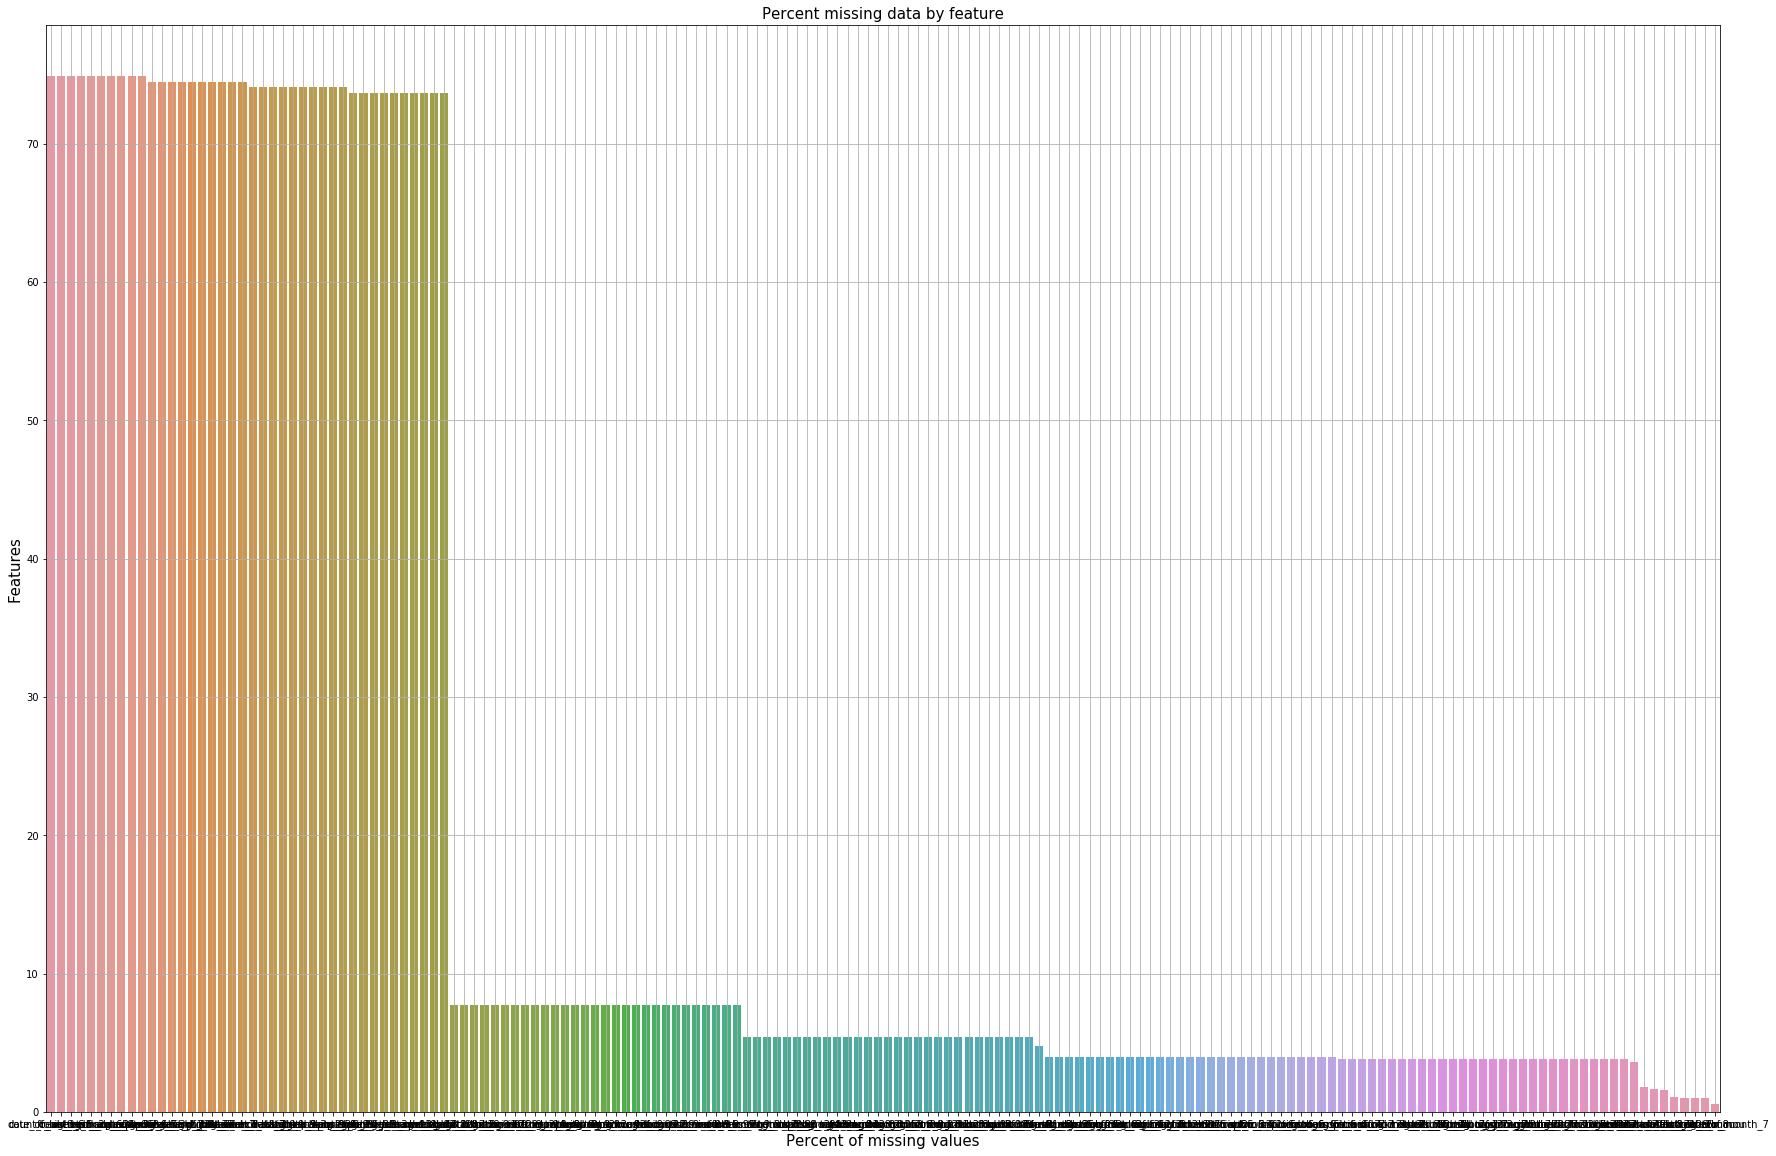

In [16]:
# Visualising complete missing data
f, ax = plt.subplots(figsize=(30, 20))
# plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Missing Percentage'])
plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.grid()

We can clearly see a pattern here where

    we do have set-1 having Missing percentage as more than 70 % 
    we do have set-2 having Missing percentage as just greater then 7 % 
    we do have set-3 having Missing percentage as less then 7 % 

In [17]:
# Getting a missing % more than 74 %
Set_1_data = missing_data.loc[missing_data['Missing Percentage'] > 70]
Set_2_data = missing_data[(missing_data['Missing Percentage'] < 70) & (missing_data['Missing Percentage'] > 7) ]
Set_3_data = missing_data.loc[missing_data['Missing Percentage'] < 7]

print(Set_1_data.shape)
print(Set_2_data.shape)
print(Set_3_data.shape)

(40, 1)
(29, 1)
(97, 1)


Text(0.5,1,'Percent missing data by feature')

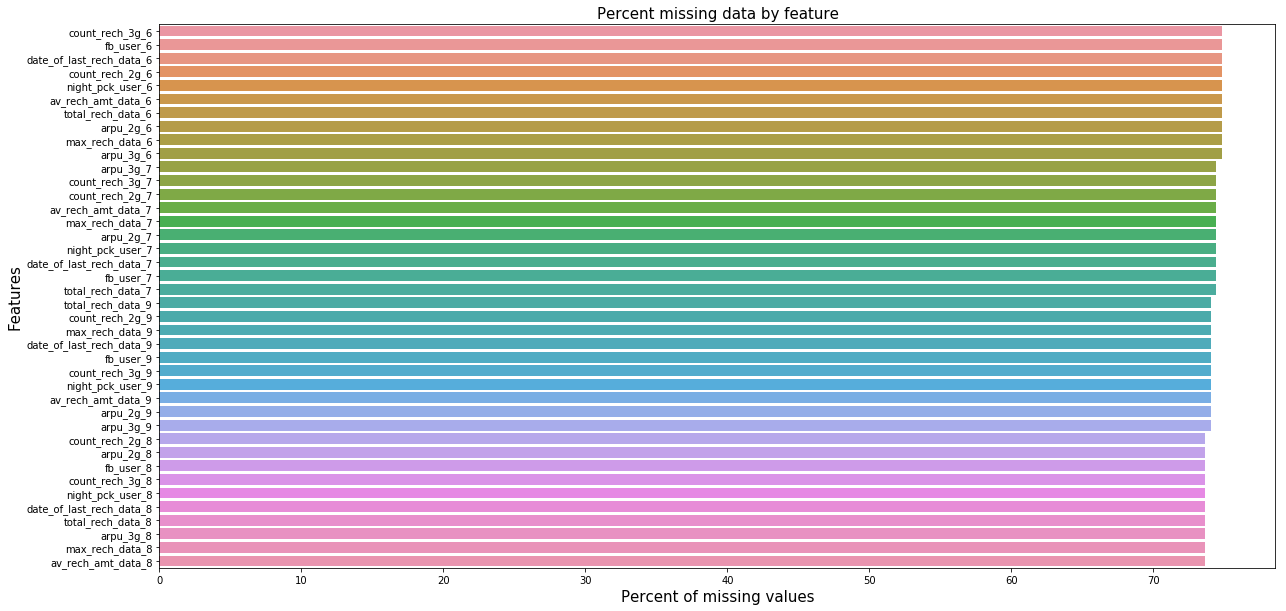

In [18]:
# Visualising missing data for Set_1_data
f, ax = plt.subplots(figsize=(20, 10))
# plt.xticks(rotation='90')
sns.barplot(y=Set_1_data.index, x=Set_1_data['Missing Percentage'])
plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5,1,'Percent missing data by feature')

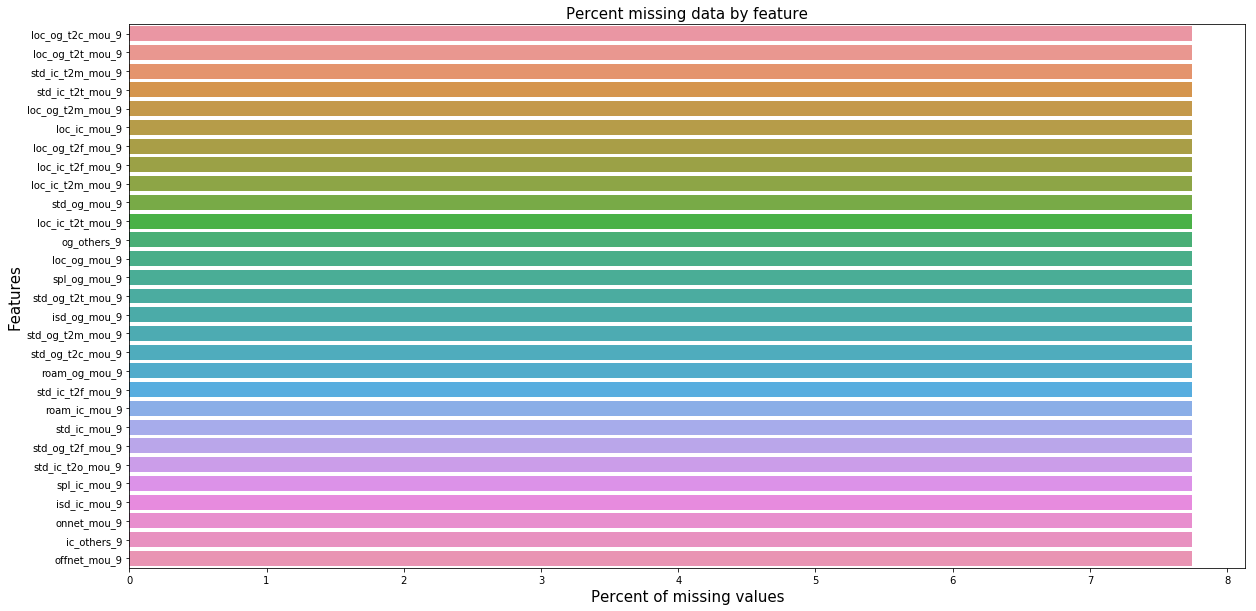

In [19]:
# Visualising missing data for Set_2_data
f, ax = plt.subplots(figsize=(20, 10))
# plt.xticks(rotation='90')
sns.barplot(y=Set_2_data.index, x=Set_2_data['Missing Percentage'])
plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5,1,'Percent missing data by feature')

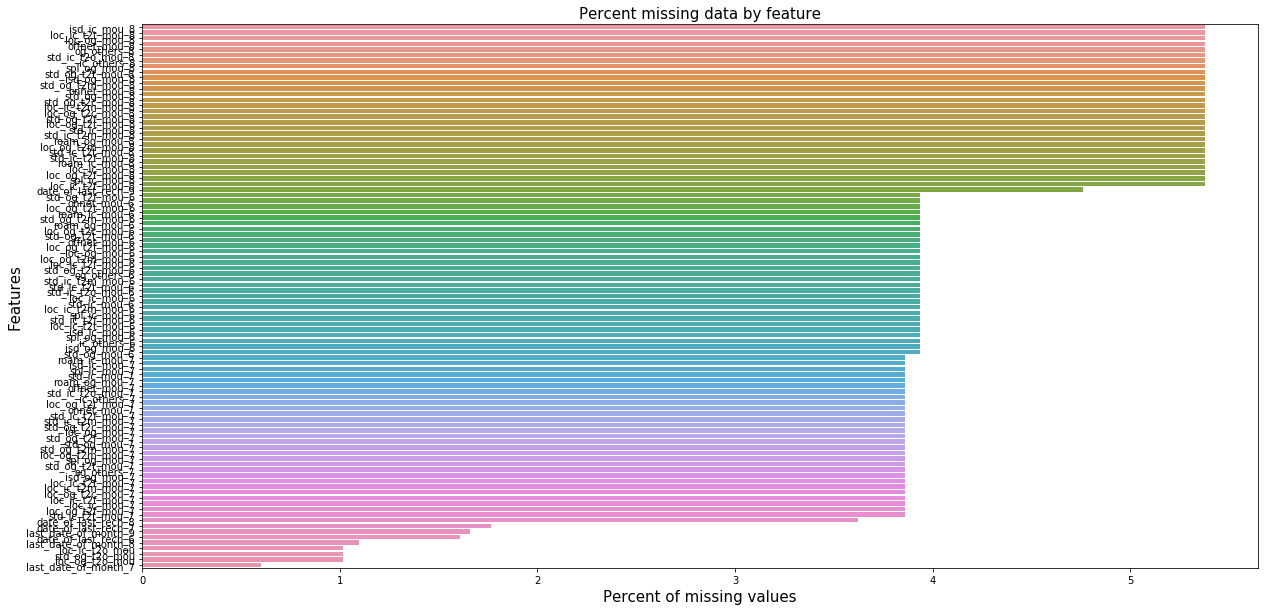

In [20]:
# Visualising missing data for Set_3_data
f, ax = plt.subplots(figsize=(20, 10))
# plt.xticks(rotation='90')
sns.barplot(y=Set_3_data.index, x=Set_3_data['Missing Percentage'])
plt.ylabel('Features', fontsize=15)
plt.xlabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [21]:
# Checking the percentage of null values in columns

null_df = pd.DataFrame((np.round((Telecom_data.isnull().sum())/len(Telecom_data.index),2)))
null_df['features'] = null_df.index
null_df = null_df.rename(columns= {0 : 'null_percentage'})
null_df.reset_index(drop = True, inplace = True)
null_df['null_percentage'].astype('category').value_counts()

0.000    60
0.040    59
0.740    30
0.050    30
0.080    29
0.750    10
0.010     5
0.020     3
Name: null_percentage, dtype: int64

We can see that approx 75 % of values are null 

In [22]:
# Lets first check how many columns talk about recharge

cols = Telecom_data.columns

def rech_cols(cols):
    return [x for x in cols if 'rech' in x]
rech_list_cols = rech_cols(cols)
print(rech_list_cols)
print('Number of columns having rech in their name:',len(rech_list_cols))

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
Number of columns having rech in their name: 40


**Observation** : there are 40 columns containing 'rech'word in the column name. From this we use 'total_rech_amt_6' and 'total_rech_amt_7' columns to calculate the average recharge amount during the good phase(June and July)

In [23]:
# Creating total Recharge for 6th & 7th Month which is the sum of Recharge amount and Recharge Data
Telecom_data = Telecom_data.fillna(0)
Telecom_data['total_recharge_on_6'] = Telecom_data['total_rech_amt_6'] + Telecom_data['total_rech_data_6']
Telecom_data['total_recharge_on_7'] = Telecom_data['total_rech_amt_7'] + Telecom_data['total_rech_data_7']


In [24]:
# Calculating average recharge amount for months of 6 and 7
Telecom_data['total_amt_good_phase'] = (Telecom_data['total_recharge_on_6']+Telecom_data['total_recharge_on_7'])/2
Telecom_data['total_amt_good_phase'].describe()

count   99999.000
mean      325.890
std       371.072
min         0.000
25%       115.000
50%       230.000
75%       420.000
max     37762.500
Name: total_amt_good_phase, dtype: float64

In [25]:
# Finding 70 % Cut Off 
list1 = Telecom_data['total_amt_good_phase'].tolist()
list1
cutoff = np.percentile(list1,70)
cutoff

369.5

In [26]:
# Taking a subset of only the High value customers by filtering the telecom churn dataframe as per requirement

Telecom_data_Set1 = Telecom_data[(Telecom_data['total_amt_good_phase'] >= cutoff)]

Telecom_data_Set1.shape

(30019, 229)

In [27]:
# Drop the column. Not required further
Telecom_data_Set1.drop('total_amt_good_phase', axis=1, inplace=True)
Telecom_data_Set1.drop('total_recharge_on_6', axis=1, inplace=True)
Telecom_data_Set1.drop('total_recharge_on_7', axis=1, inplace=True)

In [28]:
Telecom_data_Set1.shape

(30019, 226)

** Requirement **: Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile 
internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [29]:
# Tag the churners as 1 and Non churners as 0

Telecom_data_Set1['churned'] = np.where((Telecom_data_Set1['total_ic_mou_9'] == 0) & 
                            (Telecom_data_Set1['total_og_mou_9'] == 0) & 
                            (Telecom_data_Set1['vol_2g_mb_9'] == 0) & 
                            (Telecom_data_Set1['vol_3g_mb_9'] == 0), '1', '0')

In [30]:
# Cast the resulting column into int datatype

Telecom_data_Set1.churned = Telecom_data_Set1.churned.apply(np.int64)

In [31]:
# Find the percentage of churners
((Telecom_data_Set1['churned'].value_counts())/len(Telecom_data_Set1.index))*100

# There is a class imbalance

0   91.372
1    8.628
Name: churned, dtype: float64

** Requirement **: Lets drop the columns related to 9th month. 9th month data is used ONLY to identify the churners. It is the churn month

In [32]:
Telecom_data_Set1 = Telecom_data_Set1[Telecom_data_Set1.columns.drop(list(Telecom_data_Set1.filter(regex='_9')))]

In [33]:
# There is another column which has Sep data. Drop that as well.

Telecom_data_Set1.drop(['sep_vbc_3g'], axis=1, inplace=True)

In [34]:
# This dataset will be further analysed

Telecom_data_Set1.shape

(30019, 172)

###  Data Imputations :

In [35]:
# Check for columns containing one single value. They do not add any information to the model. They can be dropped

cols = list(Telecom_data_Set1)
nunique = Telecom_data_Set1.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)
print(len(cols_to_drop))

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8'],
      dtype='object')
11


In [36]:
# Drop the identified columns

Telecom_data_Set1.drop(cols_to_drop, axis=1, inplace=True)

In [37]:
# for each column
for c in list(Telecom_data_Set1.columns):
    
    # get a list of unique values
    n = Telecom_data_Set1[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

mobile_number: 30019 unique values
last_date_of_month_7
['7/31/2014' 0]
last_date_of_month_8
['8/31/2014' 0]
arpu_6: 29270 unique values
arpu_7: 29266 unique values
arpu_8: 28414 unique values
onnet_mou_6: 18810 unique values
onnet_mou_7: 18934 unique values
onnet_mou_8: 17599 unique values
offnet_mou_6: 22460 unique values
offnet_mou_7: 22651 unique values
offnet_mou_8: 21513 unique values
roam_ic_mou_6: 4339 unique values
roam_ic_mou_7: 3650 unique values
roam_ic_mou_8: 3653 unique values
roam_og_mou_6: 5173 unique values
roam_og_mou_7: 4430 unique values
roam_og_mou_8: 4383 unique values
loc_og_t2t_mou_6: 11149 unique values
loc_og_t2t_mou_7: 11152 unique values
loc_og_t2t_mou_8: 10768 unique values
loc_og_t2m_mou_6: 16737 unique values
loc_og_t2m_mou_7: 16870 unique values
loc_og_t2m_mou_8: 16160 unique values
loc_og_t2f_mou_6: 3250 unique values
loc_og_t2f_mou_7: 3265 unique values
loc_og_t2f_mou_8: 3124 unique values
loc_og_t2c_mou_6: 1660 unique values
loc_og_t2c_mou_7: 1751 uni

We can see the two Coloumns "last_date_of_month_7" and "last_date_of_month_8" , can also be dropped 

In [38]:
Telecom_data_Set1.drop('last_date_of_month_7', axis=1, inplace=True)
Telecom_data_Set1.drop('last_date_of_month_8', axis=1, inplace=True)

In [39]:
#The columns are dropped

Telecom_data_Set1.shape

(30019, 159)

In [40]:
Telecom_data_Set1.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601 1069.180 1349.850 3171.480       57.840       54.680   
8      7001524846  378.721  492.223  137.362      413.690      351.030   
13     7002191713  492.846  205.671  593.260      501.760      108.390   
16     7000875565  430.975  299.869  187.894       50.510       74.010   
17     7000187447  690.008   18.980   25.499     1185.910        9.280   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7        52.290       453.430       567.160       325.910         16.230   
8        35.080        94.660        80.630       136.480          0.000   
13      534.240       413.310       119.280       482.460         23.530   
16       70.610       296.290       229.740       162.760          0.000   
17        7.790        61.640         0.000         5.540          0.000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7          33.490         31.640         23.740         12.590         38.060   
8           0.000          0.000          0.000          0.000          0.000   
13        144.240         72.110          7.980         35.260          1.440   
16          2.830          0.000          0.000         17.740          0.000   
17          4.760          4.810          0.000          8.460         13.340   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7             51.390            31.380            40.280           308.630   
8            297.130           217.590            12.490            80.960   
13            49.630             6.190            36.010           151.130   
16            42.610            65.160            67.380           273.290   
17            38.990             0.000             0.000            58.540   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7            447.380           162.280            62.130            55.140   
8             70.580            50.540             0.000             0.000   
13            47.280           294.460             4.540             0.000   
16           145.990           128.280             0.000             4.480   
17             0.000             0.000             0.000             0.000   

    loc_og_t2f_mou_8   ...     arpu_2g_7  arpu_2g_8  night_pck_user_6  \
7             53.230   ...         0.000      0.000             0.000   
8              0.000   ...         0.000      0.000             0.000   
13            23.510   ...         0.000      0.200             0.000   
16            10.260   ...         0.000      0.000             0.000   
17             0.000   ...         0.000      0.000             0.000   

    night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  \
7              0.000             0.000             0             0   
8              0.000             0.000             0             1   
13             0.000             0.000             0             0   
16             0.000             0.000             0             0   
17             0.000             0.000             0             0   

    monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  \
7              0            0            0            0             0   
8              0            0            1            3             0   
13             0            0            0            3             0   
16             0            0            0            0             0   
17             0            0            0            0             0   

    monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
7              0             0            0            0            0   
8              0             0            0            0            0   
13             0             0            0            0            0   
16             0             0            0            0            0   
17           

In [41]:
# Identify columns that are categorical in nature, the missing values in these cols cannot be imputed with 0 values, 
# these will be imputed with -1 (implying a new category)

for column_name in Telecom_data_Set1.loc[:, (Telecom_data_Set1.dtypes == 'float64')  | (Telecom_data_Set1.dtypes == 'int64')].columns:
    if Telecom_data_Set1[column_name].min() == 0 and  Telecom_data_Set1[column_name].max() == 1 :
        Telecom_data_Set1[column_name].fillna(-1, inplace = True)

In [42]:
# Impute value 0 in all the Float datatype columns. We do not intend to lose the information available. 

Telecom_data_Set1.loc[:, Telecom_data_Set1.dtypes == 'float64'] = Telecom_data_Set1.loc[:, Telecom_data_Set1.dtypes == 'float64'].fillna(0)

In [43]:
# Impute value 0 in all the Int datatype columns. We do not intend to lose the information available. 

Telecom_data_Set1.loc[:, Telecom_data_Set1.dtypes == 'int'] = Telecom_data_Set1.loc[:, Telecom_data_Set1.dtypes == 'int'].fillna(0)

In [44]:
Telecom_data_Set1 = Telecom_data_Set1[
    Telecom_data_Set1.columns.drop(list(Telecom_data_Set1.filter(regex='date_of_last_rech_data_')))]

In [45]:
# Get names of indexes where we do have zero value for date_of_last_rech_8
indexNames = Telecom_data_Set1[(Telecom_data_Set1.date_of_last_rech_8 == 0)].index
# Delete these row indexes from dataFrame
Telecom_data_Set1.drop(indexNames , inplace=True)

In [46]:
# Get names of indexes where we do have zero value for date_of_last_rech_7
indexNames = Telecom_data_Set1[(Telecom_data_Set1.date_of_last_rech_7 == 0)].index
# Delete these row indexes from dataFrame
Telecom_data_Set1.drop(indexNames , inplace=True)

In [47]:
# Get names of indexes where we do have zero value for date_of_last_rech_6
indexNames = Telecom_data_Set1[(Telecom_data_Set1.date_of_last_rech_6 == 0)].index
# Delete these row indexes from dataFrame
Telecom_data_Set1.drop(indexNames , inplace=True)

In [48]:
Telecom_data_Set1.shape

(29324, 156)

After filtering the high-value customers, we  should get about 29K rows as per case study objective , we have got similarity in that .

In [49]:
# Getting a missing % count
all_data_missing = (Telecom_data_Set1.isnull().sum() / len(Telecom_data_Set1)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data.head(30)

Empty DataFrame
Columns: [Missing Percentage]
Index: []

So we can see we don't have any missing value in our Data Frame now.

In [50]:
# Let us see if outlier treatment is required
Telecom_data_Set1.describe(percentiles=[0.005, 0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 0.995 ]).T

count           mean        std            min  \
mobile_number      29324.000 7001222811.892 684193.817 7000000074.000   
arpu_6             29324.000        585.633    433.162       -810.661   
arpu_7             29324.000        593.616    462.373       -622.509   
arpu_8             29324.000        543.020    491.728       -345.129   
onnet_mou_6        29324.000        296.582    459.670          0.000   
onnet_mou_7        29324.000        307.158    483.336          0.000   
onnet_mou_8        29324.000        271.855    469.345          0.000   
offnet_mou_6       29324.000        416.494    466.955          0.000   
offnet_mou_7       29324.000        425.585    484.758          0.000   
offnet_mou_8       29324.000        379.360    475.135          0.000   
roam_ic_mou_6      29324.000         17.427     79.068          0.000   
roam_ic_mou_7      29324.000         13.656     76.653          0.000   
roam_ic_mou_8      29324.000         13.503     75.375          0.000   
roam_og_mou_6      29324.000         29.204    118.054          0.000   
roam_og_mou_7      29324.000         22.289     98.648          0.000   
roam_og_mou_8      29324.000         21.841    107.323          0.000   
loc_og_t2t_mou_6   29324.000         94.943    237.989          0.000   
loc_og_t2t_mou_7   29324.000         96.645    249.890          0.000   
loc_og_t2t_mou_8   29324.000         88.382    236.745          0.000   
loc_og_t2m_mou_6   29324.000        180.575    248.535          0.000   
loc_og_t2m_mou_7   29324.000        181.867    240.089          0.000   
loc_og_t2m_mou_8   29324.000        169.373    233.617          0.000   
loc_og_t2f_mou_6   29324.000          6.940     22.676          0.000   
loc_og_t2f_mou_7   29324.000          7.082     22.639          0.000   
loc_og_t2f_mou_8   29324.000          6.528     20.284          0.000   
loc_og_t2c_mou_6   29324.000          1.573      6.932          0.000   
loc_og_t2c_mou_7   29324.000          1.871      9.323          0.000   
loc_og_t2c_mou_8   29324.000          1.744      7.469          0.000   
loc_og_mou_6       29324.000        282.467    379.414          0.000   
loc_og_mou_7       29324.000        285.603    376.207          0.000   
loc_og_mou_8       29324.000        264.291    366.310          0.000   
std_og_t2t_mou_6   29324.000        190.110    408.347          0.000   
std_og_t2t_mou_7   29324.000        201.697    429.551          0.000   
std_og_t2t_mou_8   29324.000        175.062    412.965          0.000   
std_og_t2m_mou_6   29324.000        202.535    411.212          0.000   
std_og_t2m_mou_7   29324.000        214.293    437.646          0.000   
std_og_t2m_mou_8   29324.000        181.740    417.274          0.000   
std_og_t2f_mou_6   29324.000          1.975     12.130          0.000   
std_og_t2f_mou_7   29324.000          2.014     13.306          0.000   
std_og_t2f_mou_8   29324.000          1.788     11.661          0.000   
std_og_mou_6       29324.000        394.625    602.854          0.000   
std_og_mou_7       29324.000        418.009    637.600          0.000   
std_og_mou_8       29324.000        358.594    617.375          0.000   
isd_og_mou_6       29324.000          2.162     45.509          0.000   
isd_og_mou_7       29324.000          2.207     45.957          0.000   
isd_og_mou_8       29324.000          2.068     45.314          0.000   
spl_og_mou_6       29324.000          5.918     18.649          0.000   
spl_og_mou_7       29324.000          7.482     23.253          0.000   
spl_og_mou_8       29324.000          7.007     23.111          0.000   
og_others_6        29324.000          0.693      2.283          0.000   
og_others_7        29324.000          0.048      2.773          0.000   
og_others_8        29324.000          0.060      3.359          0.000   
total_og_mou_6     29324.000        685.874    655.347          0.000   
total_og_mou_7     29324.000        713.358    682.854          0.000   
total_og

In [51]:
# Clearly there are outliers in the data, let us try to remove those records first

Telecom_data_Set2 = Telecom_data_Set1.copy()

columns_to_ignore = ['mobile_number','churned', 
                     'sachet_3g_6', 'sachet_3g_7','sachet_3g_8', 'sachet_2g_6', 'sachet_2g_7','sachet_2g_8',
                     'monthly_3g_6','monthly_3g_7','monthly_3g_8', 'monthly_2g_6','monthly_2g_7','monthly_2g_8',
                     'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                     'night_pck_user_6','night_pck_user_7','night_pck_user_8',
                     'fb_user_6', 'fb_user_7', 'fb_user_8',
                     'total_rech_data_6','total_rech_data_7','total_rech_data_8',
                     'max_rech_data_6','max_rech_data_7','max_rech_data_8','aon']
columns_to_check_quantiles = [i for i in Telecom_data_Set1.describe().columns if i not in columns_to_ignore]
ser = Telecom_data_Set1.quantile(0.995)
for idx, value in ser.items():
    if idx in columns_to_check_quantiles:
        Telecom_data_Set2 = Telecom_data_Set2[ Telecom_data_Set2[idx] <= value ]


In [52]:
Telecom_data_Set2.shape

(23129, 156)

In [53]:
# So we can see only around 200 records got removed after coarse outlier removal

In [54]:
Telecom_data_Set2.describe(percentiles=[0.005, 0.01, 0.02, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 0.995 ]).T

count           mean        std            min  \
mobile_number      23129.000 7001225896.943 682772.094 7000000229.000   
arpu_6             23129.000        524.515    255.937       -160.795   
arpu_7             23129.000        524.934    253.214       -179.027   
arpu_8             23129.000        474.762    288.895       -345.129   
onnet_mou_6        23129.000        267.597    353.016          0.000   
onnet_mou_7        23129.000        273.241    363.938          0.000   
onnet_mou_8        23129.000        238.308    346.884          0.000   
offnet_mou_6       23129.000        376.188    358.291          0.000   
offnet_mou_7       23129.000        380.305    362.050          0.000   
offnet_mou_8       23129.000        335.152    347.035          0.000   
roam_ic_mou_6      23129.000         11.906     42.599          0.000   
roam_ic_mou_7      23129.000          8.134     33.217          0.000   
roam_ic_mou_8      23129.000          8.372     33.918          0.000   
roam_og_mou_6      23129.000         21.452     71.048          0.000   
roam_og_mou_7      23129.000         14.978     55.421          0.000   
roam_og_mou_8      23129.000         14.449     54.007          0.000   
loc_og_t2t_mou_6   23129.000         79.603    141.763          0.000   
loc_og_t2t_mou_7   23129.000         79.684    140.744          0.000   
loc_og_t2t_mou_8   23129.000         72.757    129.138          0.000   
loc_og_t2m_mou_6   23129.000        166.382    192.721          0.000   
loc_og_t2m_mou_7   23129.000        168.250    189.339          0.000   
loc_og_t2m_mou_8   23129.000        156.208    186.873          0.000   
loc_og_t2f_mou_6   23129.000          5.353     12.534          0.000   
loc_og_t2f_mou_7   23129.000          5.501     12.659          0.000   
loc_og_t2f_mou_8   23129.000          5.053     11.846          0.000   
loc_og_t2c_mou_6   23129.000          1.145      3.582          0.000   
loc_og_t2c_mou_7   23129.000          1.286      3.942          0.000   
loc_og_t2c_mou_8   23129.000          1.252      3.883          0.000   
loc_og_mou_6       23129.000        251.346    273.134          0.000   
loc_og_mou_7       23129.000        253.444    268.514          0.000   
loc_og_mou_8       23129.000        234.027    263.275          0.000   
std_og_t2t_mou_6   23129.000        179.454    338.277          0.000   
std_og_t2t_mou_7   23129.000        187.368    350.310          0.000   
std_og_t2t_mou_8   23129.000        159.741    330.651          0.000   
std_og_t2m_mou_6   23129.000        186.432    330.427          0.000   
std_og_t2m_mou_7   23129.000        192.659    338.209          0.000   
std_og_t2m_mou_8   23129.000        160.584    307.137          0.000   
std_og_t2f_mou_6   23129.000          1.081      4.866          0.000   
std_og_t2f_mou_7   23129.000          1.039      4.758          0.000   
std_og_t2f_mou_8   23129.000          0.950      4.477          0.000   
std_og_mou_6       23129.000        366.971    489.954          0.000   
std_og_mou_7       23129.000        381.071    503.244          0.000   
std_og_mou_8       23129.000        321.278    475.485          0.000   
isd_og_mou_6       23129.000          0.479      4.080          0.000   
isd_og_mou_7       23129.000          0.485      4.015          0.000   
isd_og_mou_8       23129.000          0.343      3.449          0.000   
spl_og_mou_6       23129.000          4.429      9.564          0.000   
spl_og_mou_7       23129.000          5.618     11.182          0.000   
spl_og_mou_8       23129.000          5.171     10.479          0.000   
og_others_6        23129.000          0.561      1.480          0.000   
og_others_7        23129.000          0.000      0.001          0.000   
og_others_8        23129.000          0.000      0.003          0.000   
total_og_mou_6     23129.000        623.796    496.597          0.000   
total_og_mou_7     23129.000        640.626    505.773          0.000   
total_og

In [55]:
Telecom_data_Set2 = Telecom_data_Set2[ (Telecom_data_Set2.arpu_6 >= 0) 
                                      & (Telecom_data_Set2.arpu_7 >= 0) 
                                      & (Telecom_data_Set2.arpu_8 >= 0) ]

In [56]:
Telecom_data_Set2.shape

(23060, 156)

In [57]:
# So overall 264 records got removed after outlier treatment

In [58]:
# Now find the percentage of churners

(((Telecom_data_Set2['churned'].value_counts())/len(Telecom_data_Set2.index))*100).reset_index()

index  churned
0      0   92.546
1      1    7.454

### EDA

In [59]:
# Now find the percentage of churners

(((Telecom_data_Set1['churned'].value_counts())/len(Telecom_data_Set1.index))*100).reset_index()

index  churned
0      0   92.320
1      1    7.680

In [60]:
# So we can see after outlier removal the churned and not churned data ratio is almost same in both the data set,


# This will be mainly required for EDA 
# For Models related to Decision Tree families we can go with outliers as those models are not senitive to outliers
# Hence we will use Telecom_data_Set2 mainly in EDA phase

# Telecom_data_Set1 is with outliers
# Telecom_data_Set2 is without outliers


### Perform Univariate Analysis

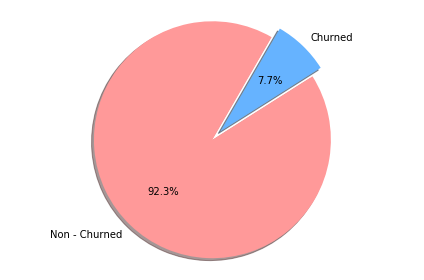

In [61]:
# Plot showing the Churn distribution

# Set the Label
labels = 'Non - Churned', 'Churned'
# Setting the colour of our Pie Chart

colors = ['#ff9999','#66b3ff']

# explode 1st slice
explode = (0.1, 0)

# Now do the plotting 
plt.pie((((Telecom_data_Set1['churned'].value_counts())/
          len(Telecom_data_Set1.index))*100).reset_index()['churned'], autopct='%1.1f%%', 
       explode=explode, labels=labels, colors=colors, shadow=True, startangle=60)

# Equal aspect ratio ensures that pie is drawn as a circle    
plt.axis('equal')
plt.tight_layout()
plt.show()

Since the percentage of the two categories is skewed, there is a class imbalance and may cause the algorithms to 
wrongly tag the churners as non churners. This imbalance would have be handled through sampling techniques and enable
the algorithms to carry out accurate predictions

## Average Revenue per user

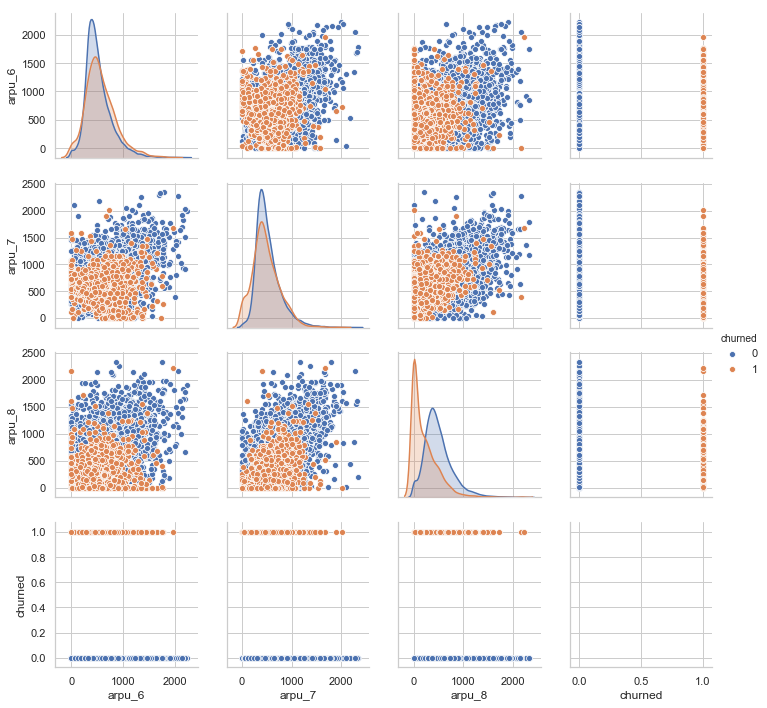

In [62]:
sns.set(style="whitegrid")
sns.pairplot(data=Telecom_data_Set2[['arpu_6','arpu_7','arpu_8','churned']],hue='churned')

## On network/ within the same network usage

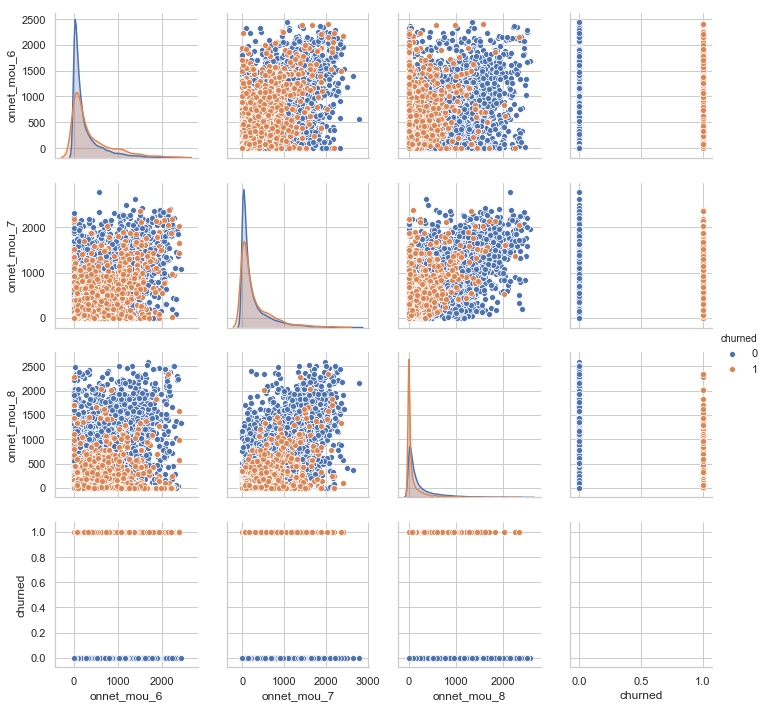

In [63]:
sns.pairplot(data=Telecom_data_Set2[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churned']],hue='churned')

## Calls outside of the operator network

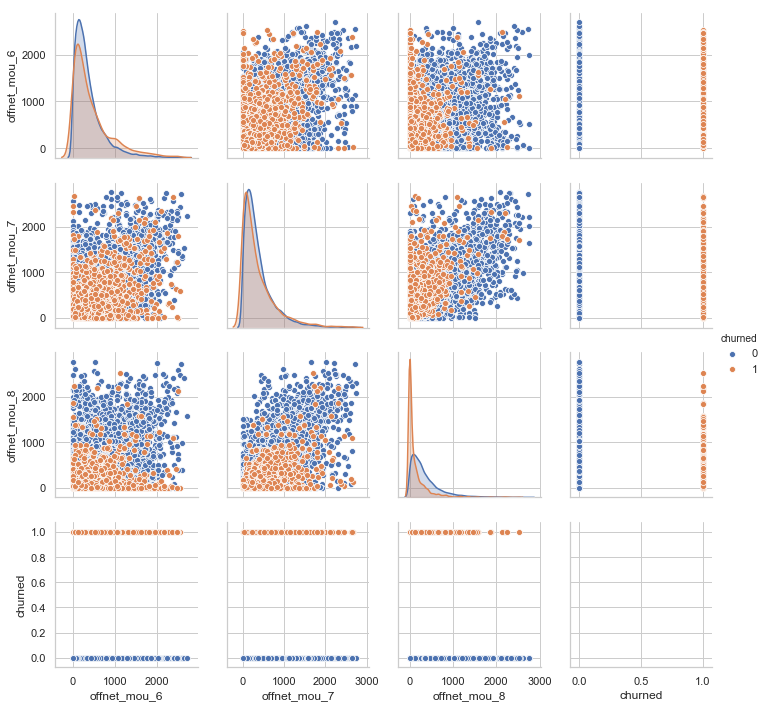

In [64]:
sns.pairplot(data=Telecom_data_Set2[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churned']],hue='churned')

## Customer in roaming zone

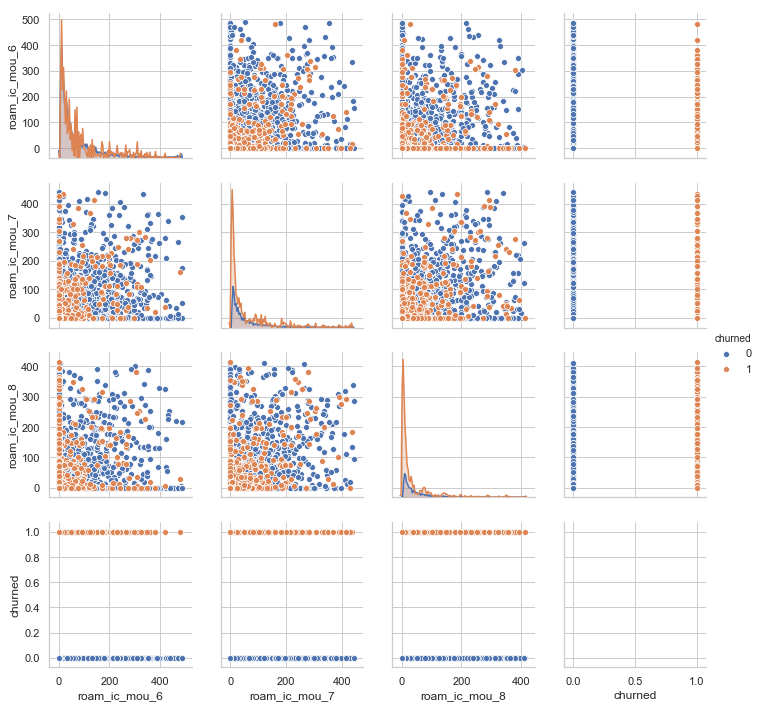

In [65]:
sns.pairplot(data=Telecom_data_Set2[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churned']],hue='churned')

## Within the circle outgoing calls

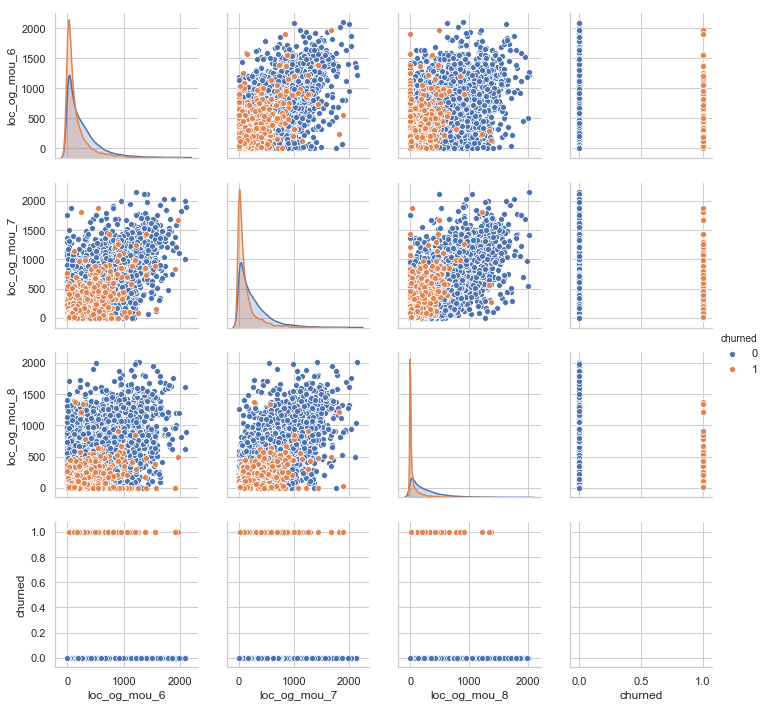

In [66]:
sns.pairplot(data=Telecom_data_Set2[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churned']],hue='churned')

## Outside calling circle/zone calls

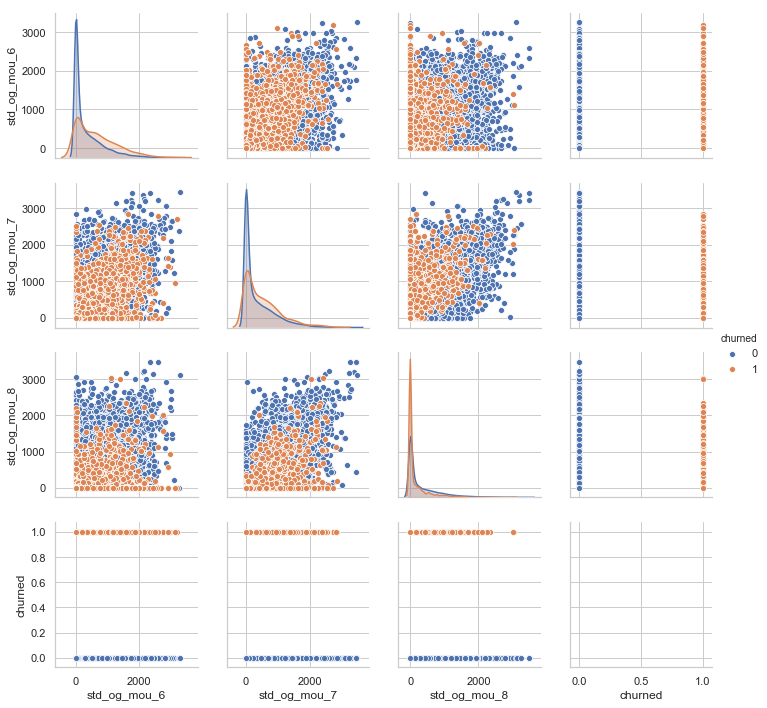

In [67]:
sns.pairplot(data=Telecom_data_Set2[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churned']],hue='churned')

## International calling

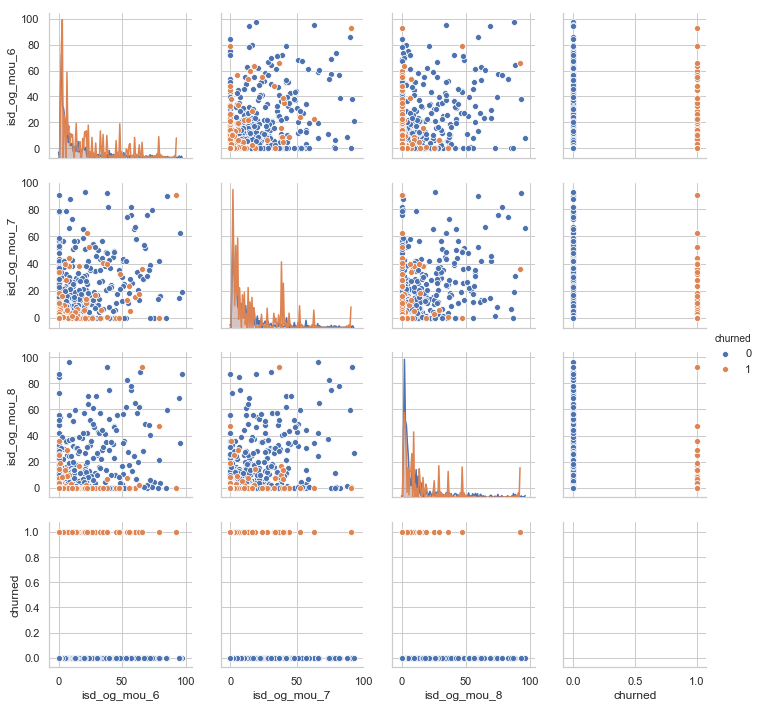

In [68]:
sns.pairplot(data=Telecom_data_Set2[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churned']],hue='churned')

## All outgoing calls by the customer

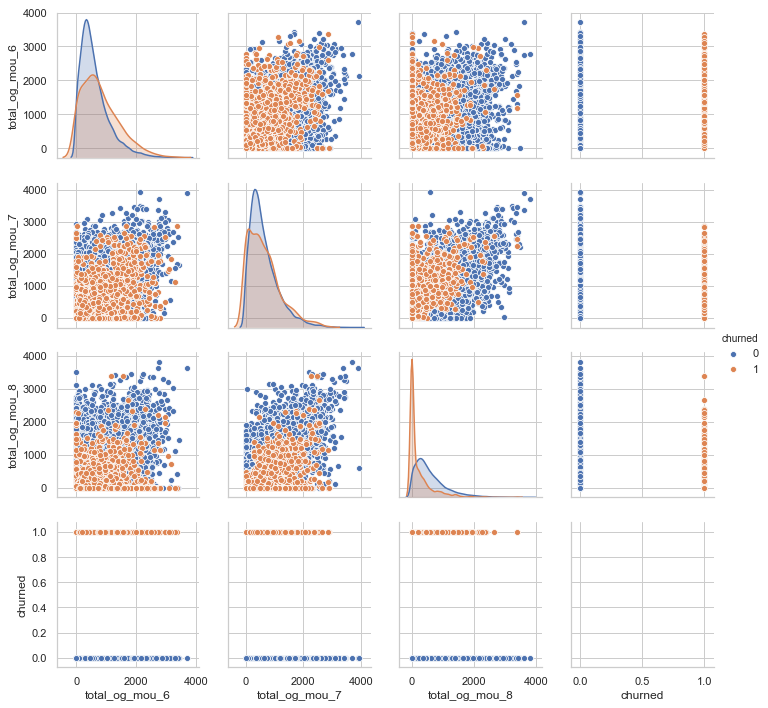

In [69]:
sns.pairplot(data=Telecom_data_Set2[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churned']],hue='churned')

## Incoming local calls

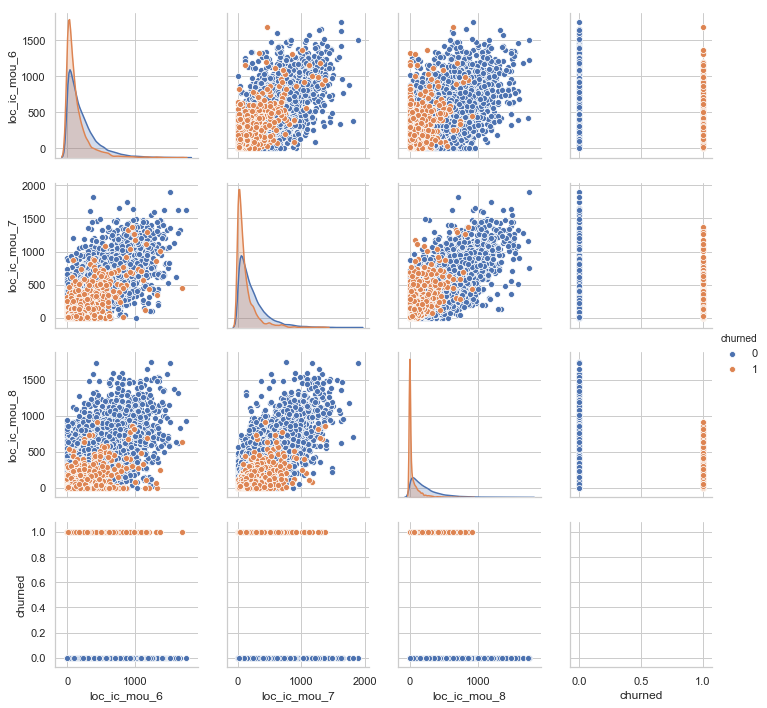

In [70]:
sns.pairplot(data=Telecom_data_Set2[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churned']],hue='churned')

## Outside circle incoming calls

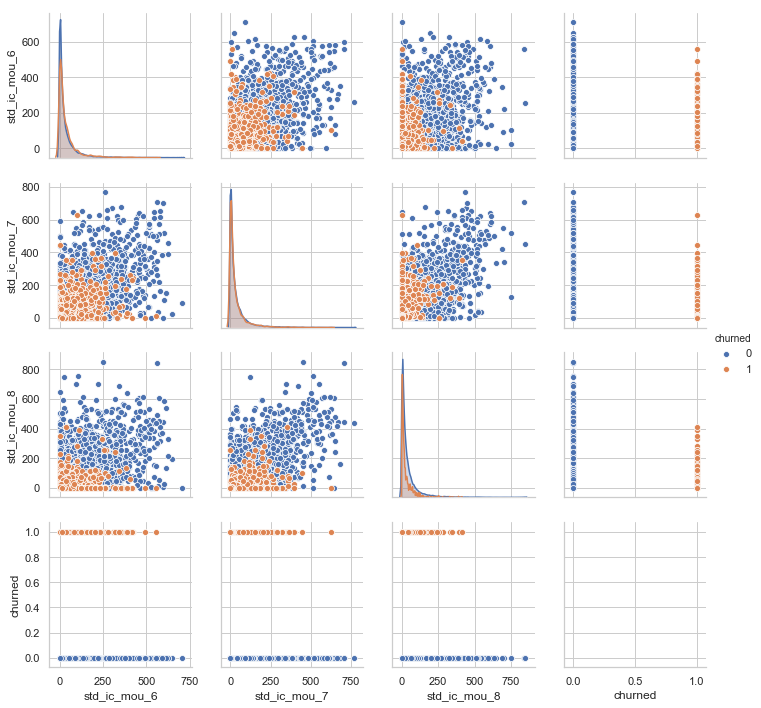

In [71]:
sns.pairplot(data=Telecom_data_Set2[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churned']],hue='churned')

## All incoming calls received by a person

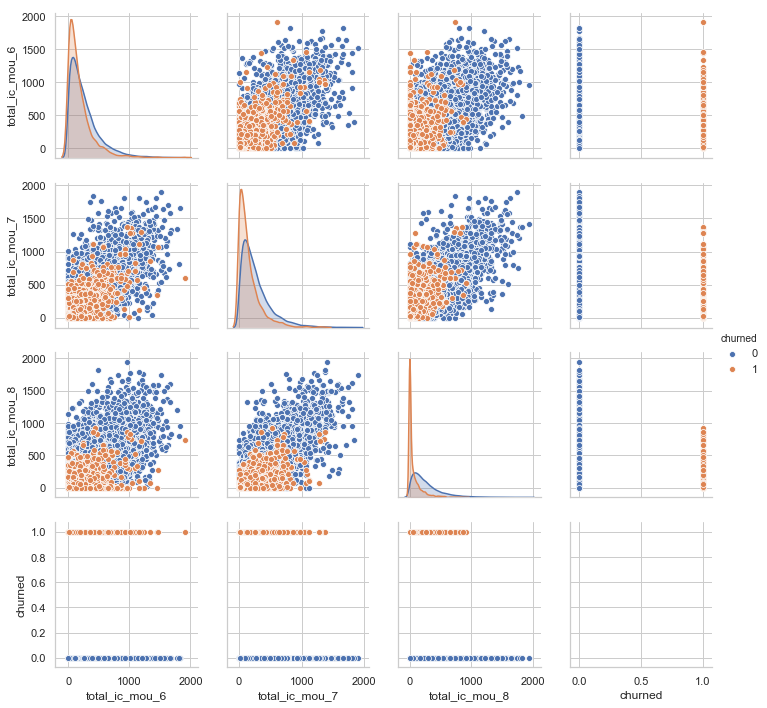

In [72]:
sns.pairplot(data=Telecom_data_Set2[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churned']],hue='churned')

## Number of times a subscriber recharged his mobile

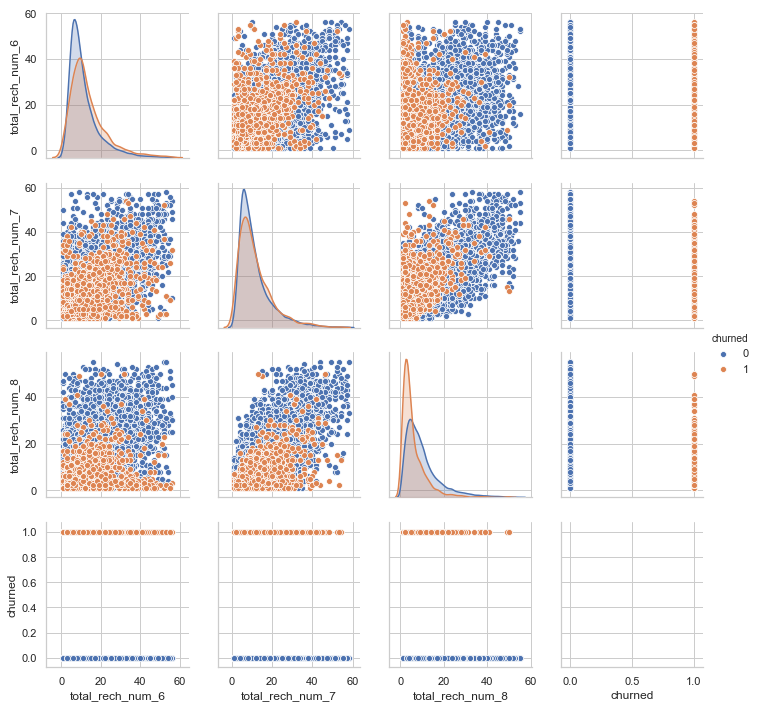

In [73]:
sns.pairplot(data=Telecom_data_Set2[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churned']],hue='churned')

## Total recharge amount in a particular month

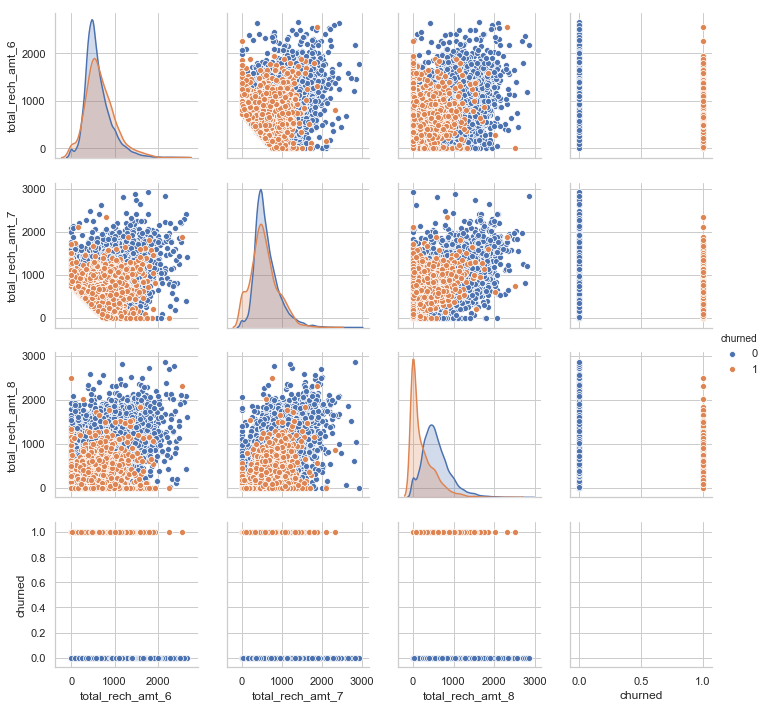

In [74]:
sns.pairplot(data=Telecom_data_Set2[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churned']],hue='churned')

## Total number of times mobile data has been recharged

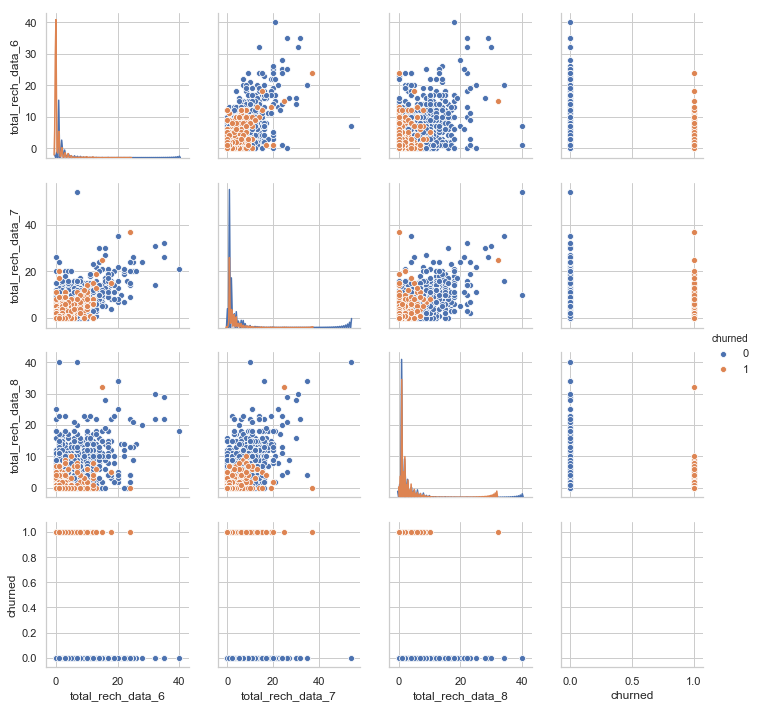

In [75]:
sns.pairplot(data=Telecom_data_Set2[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churned']],hue='churned')

## 2G Internet usage in MB

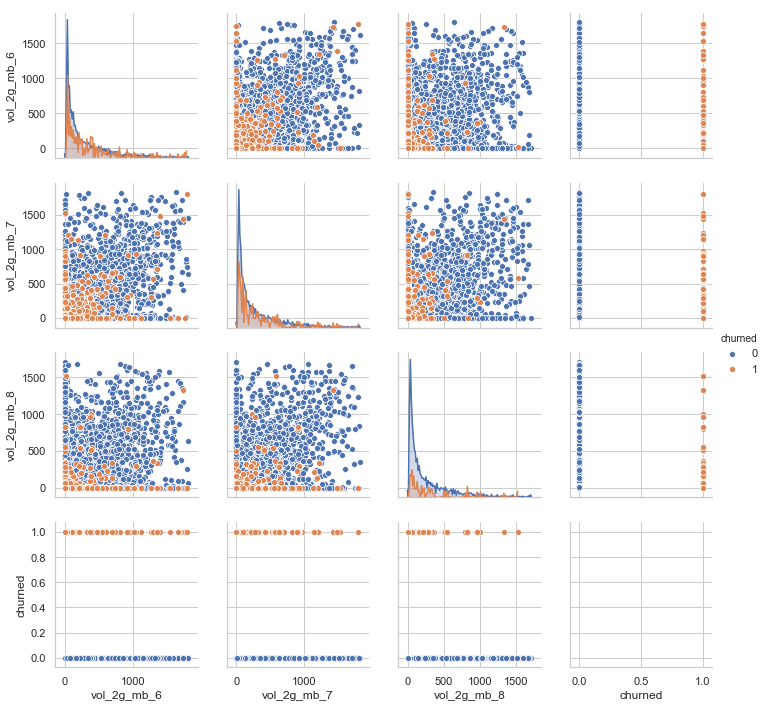

In [76]:
sns.pairplot(data=Telecom_data_Set2[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churned']],hue='churned')

## 3G Internet usage in MB

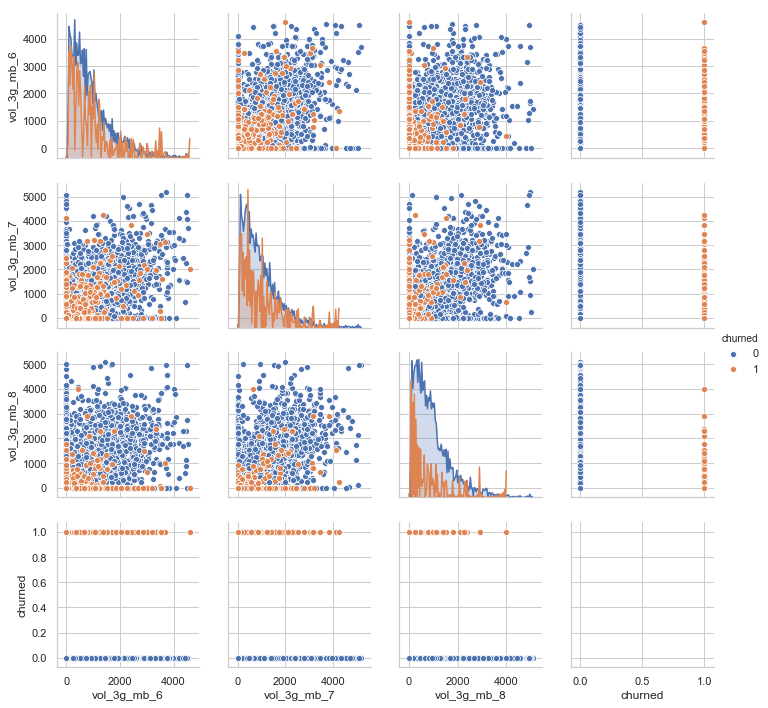

In [77]:
sns.pairplot(data=Telecom_data_Set2[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churned']],hue='churned')

## Volume based cost - paid as per usage

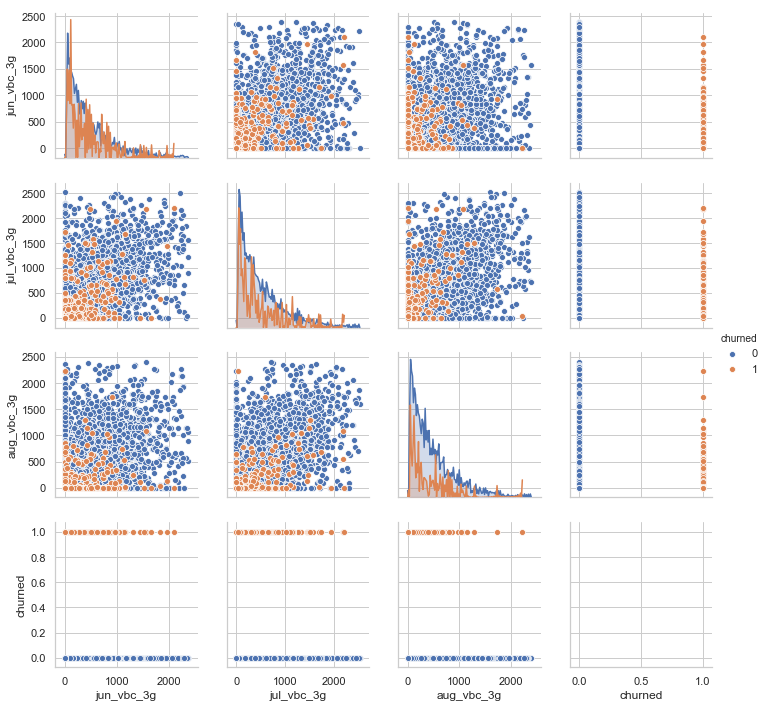

In [78]:
sns.pairplot(data=Telecom_data_Set2[['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','churned']],hue='churned')

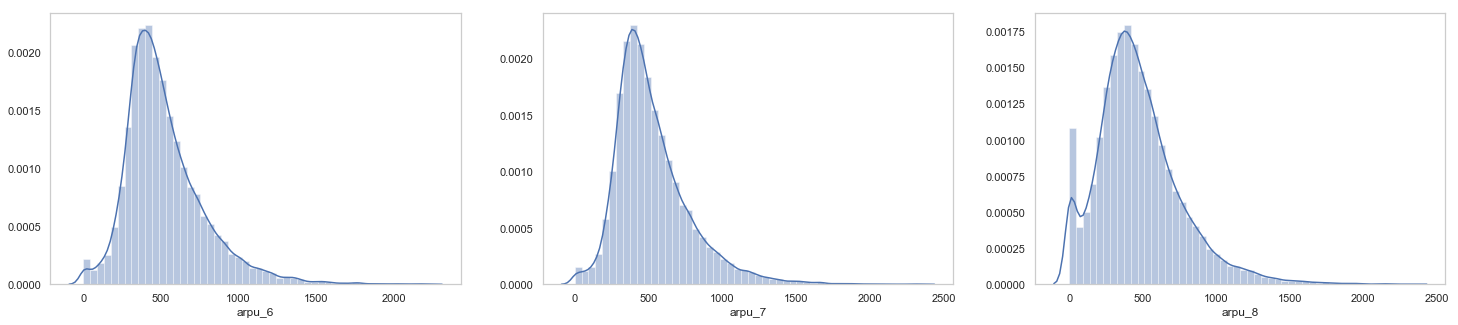

In [79]:
# Plotting the distribution of average revenue per user

plt.figure(figsize = (25,5))
plt.subplot(131)
sns.distplot(Telecom_data_Set2['arpu_6'])
plt.grid()
plt.subplot(132)
sns.distplot(Telecom_data_Set2['arpu_7'])
plt.grid()
plt.subplot(133)
sns.distplot(Telecom_data_Set2['arpu_8'])
plt.grid()
plt.show()

arpu is mostly in range of 0-2000. The Average Revenue per user is less than 2000 rupees for most of the users

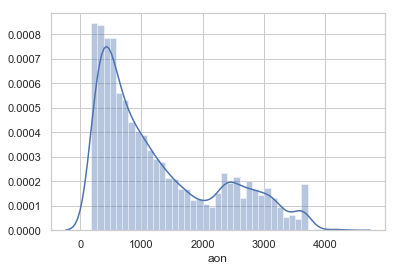

In [80]:
# Distribution of age on network on the loyalty - Age on network

sns.distplot(Telecom_data_Set2['aon'])
plt.show()

Text(0.5,0.98,'Distribution of Age on network - number of days the customer is using the network')

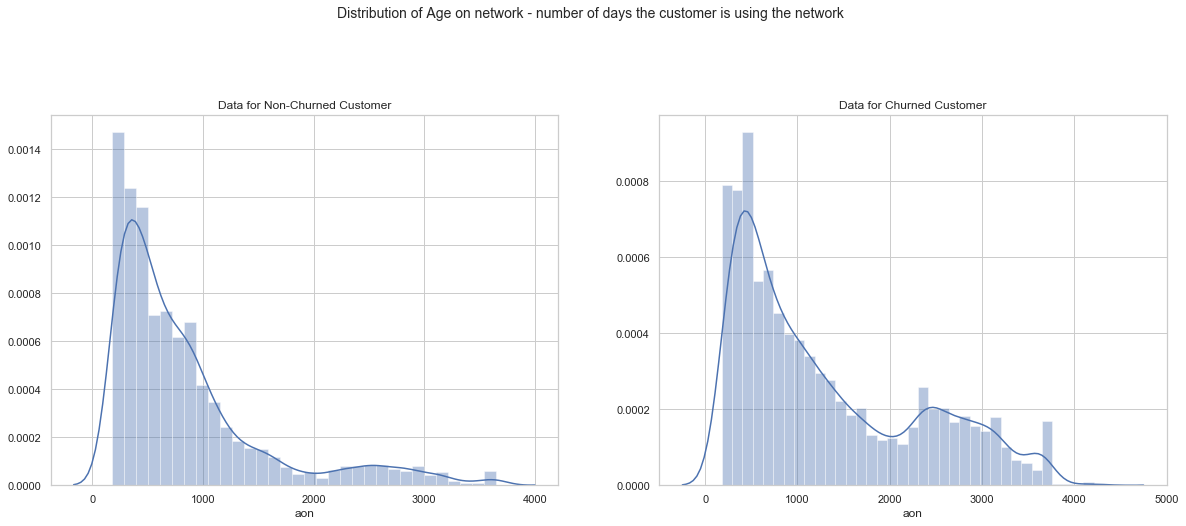

In [81]:
plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='Data for Churned Customer')
sns.distplot(Telecom_data_Set2[Telecom_data_Set2['churned'] == 0]['aon'])

plt.subplot(the_grid[0, 0], title='Data for Non-Churned Customer')
sns.distplot(Telecom_data_Set2[Telecom_data_Set2['churned'] == 1]['aon'])

plt.suptitle('Distribution of Age on network - number of days the customer is using the network', fontsize=14)

There are many fairly new customers compared to long time customers

Churners are relatively less among the long time customers. They are Loyal customers

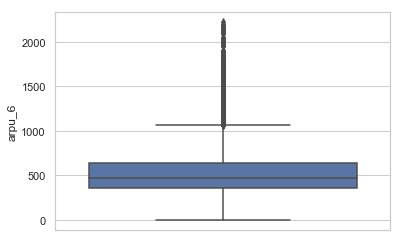

In [82]:
# Distribution of Avg revenue per user

ax = sns.boxplot(y="arpu_6", data=Telecom_data_Set2)
plt.show()

Still there are few outliers in the data

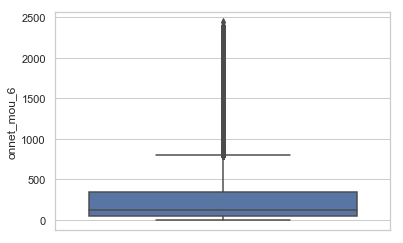

In [83]:
# Distribution of On Net Minutes of Usage

ax = sns.boxplot(y="onnet_mou_6", data=Telecom_data_Set2)
plt.show()

In [84]:
# There seems to be outliers. Handle Outliers

Telecom_data_Set2.describe()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
count      23060.000 23060.000 23060.000 23060.000    23060.000    23060.000   
mean  7001225525.690   524.717   525.721   475.791      267.775      273.715   
std       682704.225   255.614   252.478   288.333      353.079      364.034   
min   7000000229.000     0.000     0.000     0.000        0.000        0.000   
25%   7000645533.250   356.675   359.554   288.192       43.080       43.338   
50%   7001232697.000   472.269   471.572   434.643      126.460      125.710   
75%   7001815009.500   642.486   640.627   616.655      344.050      350.452   
max   7002410903.000  2219.943  2345.130  2326.899     2437.710     2775.560   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count    23060.000     23060.000     23060.000     23060.000      23060.000   
mean       238.929       376.307       381.023       335.936         11.907   
std        347.157       357.925       362.204       347.122         42.587   
min          0.000         0.000         0.000         0.000          0.000   
25%         29.587       136.680       136.180        98.425          0.000   
50%        100.725       273.470       274.675       236.160          0.000   
75%        290.590       492.830       501.512       453.613          0.000   
max       2585.590      2700.710      2756.360      2758.930        488.190   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count      23060.000      23060.000      23060.000      23060.000   
mean           8.130          8.375         21.457         14.982   
std           33.209         33.908         71.057         55.436   
min            0.000          0.000          0.000          0.000   
25%            0.000          0.000          0.000          0.000   
50%            0.000          0.000          0.000          0.000   
75%            0.000          0.000          0.000          0.000   
max          440.980        413.780        759.610        676.940   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count      23060.000         23060.000         23060.000         23060.000   
mean          14.482            79.681            79.845            72.921   
std           54.077           141.729           140.889           129.257   
min            0.000             0.000             0.000             0.000   
25%            0.000             8.840             9.690             6.540   
50%            0.000            32.535            33.535            29.185   
75%            0.000            88.865            89.195            82.637   
max          641.310          1526.080          1682.840          1506.140   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count         23060.000         23060.000         23060.000         23060.000   
mean            166.631           168.587           156.575             5.359   
std             192.860           189.442           186.978            12.541   
min               0.000             0.000             0.000             0.000   
25%              31.360            34.930            24.960             0.000   
50%             101.165           105.460            92.730             0.260   
75%             233.065           234.510           220.982             4.510   
max            1496.430          1391.060          1357.340           120.390   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8    ...     arpu_2g_7  arpu_2g_8  \
count         23060.000         23060.000    ...     23060.000  23060.000   
mean              5.511             5.061    ...        39.240     36.767   
std              12.673            11.857    ...       104.349    100.253   
min               0.000             0.000    ...       -15.480     -8.790   
25%               0.000             0.000    ...         0.000      0.000   
50%               0.350             0.110    ...         

### Bivariate Analysis

In [85]:
# To show the trend in the average revenue collection from June to Aug

churn_arpu = pd.melt(Telecom_data_Set2[['mobile_number', 
                                        'churned', 'arpu_6', 'arpu_7', 'arpu_8']],
                     id_vars = ['mobile_number', 'churned'], value_name = 'arpu_amt' )

In [86]:
churn_arpu.head()

mobile_number  churned variable  arpu_amt
0     7001524846        0   arpu_6   378.721
1     7000875565        0   arpu_6   430.975
2     7000187447        0   arpu_6   690.008
3     7002124215        0   arpu_6   514.453
4     7001125315        0   arpu_6   422.050

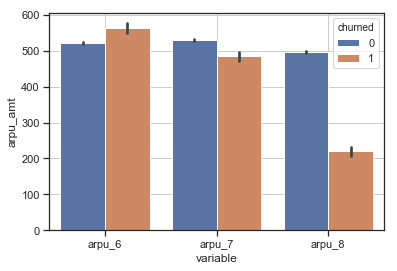

In [87]:
# The churners data shows that the average collection of revenue has a decreasing trend in 8th month

sns.set_style("ticks")
sns.barplot(x = 'variable', y = 'arpu_amt', hue = 'churned', data = churn_arpu)
plt.grid()
plt.show()

The Avg revenue per user drops in 8th month for churners

In [88]:
# Similar study on the Minutes of Usage 

churn_total_og_mou = pd.melt(Telecom_data_Set2[
    ['mobile_number', 'churned', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']], 
                             id_vars = ['mobile_number', 'churned'], value_name = 'total_og_mou' )

In [89]:
churn_total_og_mou.head()

mobile_number  churned        variable  total_og_mou
0     7001524846        0  total_og_mou_6       508.360
1     7000875565        0  total_og_mou_6       346.810
2     7000187447        0  total_og_mou_6      1249.530
3     7002124215        0  total_og_mou_6       860.340
4     7001125315        0  total_og_mou_6       564.630

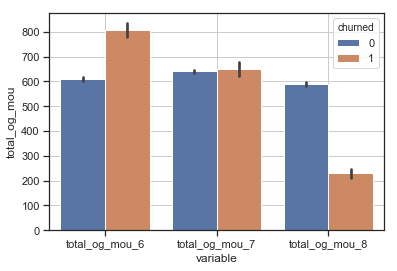

In [90]:
# Minutes of Usage trend on churned and Non churned customers

sns.barplot(x = 'variable', y = 'total_og_mou', hue = 'churned', data = churn_total_og_mou)
plt.grid()
plt.show()

The minutes of usage drops from 6 to 8th month for churners,in fact, it can also be noticed that Churners have a very high MoU in the 6th month 

In [91]:
# Add up the Minutes of usage on Net and Offnet services 

Telecom_data_Set1['net_mou_6'] = Telecom_data_Set1['onnet_mou_6'] + Telecom_data_Set1['offnet_mou_6']
Telecom_data_Set1['net_mou_7'] = Telecom_data_Set1['onnet_mou_7'] + Telecom_data_Set1['offnet_mou_7']
Telecom_data_Set1['net_mou_8'] = Telecom_data_Set1['onnet_mou_8'] + Telecom_data_Set1['offnet_mou_8']

In [92]:
churn_net_mou = pd.melt(
    Telecom_data_Set1[['mobile_number', 'churned', 'net_mou_6', 'net_mou_7', 'net_mou_8']], 
    id_vars = ['mobile_number', 'churned'], value_name = 'net_mou' )

In [93]:
churn_net_mou.head()

mobile_number  churned   variable  net_mou
0     7000701601        1  net_mou_6  511.270
1     7001524846        0  net_mou_6  508.350
2     7002191713        0  net_mou_6  915.070
3     7000875565        0  net_mou_6  346.800
4     7000187447        0  net_mou_6 1247.550

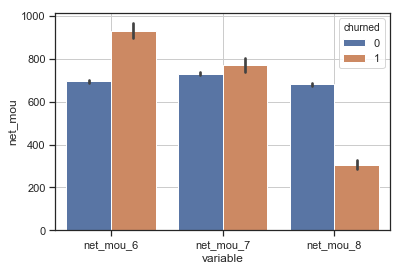

In [94]:
# Trend of Internet minutes of Usage with churners and Non Churners

sns.barplot(x = 'variable', y = 'net_mou', hue = 'churned', data = churn_net_mou)
plt.grid()
plt.show()

Net usage is reducing with the churners in August

In [95]:
# Pattern on the Average recharge amount on Data

churn_avg_rech_amt = pd.melt(Telecom_data_Set2[
    ['mobile_number', 'churned', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']], 
                             id_vars = ['mobile_number', 'churned'], value_name = 'avg_rech_amt' )

churn_avg_rech_amt.head()


mobile_number  churned            variable  avg_rech_amt
0     7001524846        0  av_rech_amt_data_6         0.000
1     7000875565        0  av_rech_amt_data_6         0.000
2     7000187447        0  av_rech_amt_data_6         0.000
3     7002124215        0  av_rech_amt_data_6         0.000
4     7001125315        0  av_rech_amt_data_6         0.000

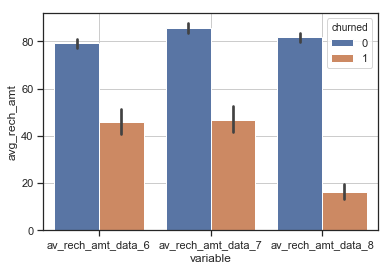

In [96]:
# Relative pattern of Churners and Non churners

sns.barplot(x = 'variable', y = 'avg_rech_amt', hue = 'churned', data = churn_avg_rech_amt)
plt.grid()
plt.show()

Average recharge amount on Data has decreased from June to August with Churners

These dataframes were created only for visualization purposes, now we can get rid of them

In [97]:
del churn_arpu, churn_total_og_mou, churn_net_mou, churn_avg_rech_amt

In [98]:
# Lets drop the base value columns 

Telecom_data_Set1.drop(
    ['onnet_mou_6', 'offnet_mou_6', 'onnet_mou_7', 'offnet_mou_7', 'onnet_mou_8', 'offnet_mou_8'], axis=1, inplace=True)

In [99]:
# To confirm that total_og_mou is aggregate of the different types of Outgoing calls 

og = Telecom_data_Set1[['roam_og_mou_6', 'loc_og_t2t_mou_6', 
            'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 
            'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6','std_og_t2f_mou_6', 
            'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6']]

In [100]:
og['total'] = og['loc_og_t2t_mou_6']
+og['loc_og_t2m_mou_6']+og['loc_og_t2f_mou_6']+og['loc_og_t2c_mou_6']
+og['std_og_t2t_mou_6']+og['std_og_t2m_mou_6']+og['std_og_t2f_mou_6']+og['isd_og_mou_6']
+og['spl_og_mou_6']+og['og_others_6']


7         4.500
8         0.000
13        0.000
16        0.000
17        3.510
21        0.000
24       10.540
33        0.000
38        0.000
41        0.030
48        3.030
53        5.560
56        3.410
57       11.880
60        0.000
61        4.740
69        0.000
73       13.110
74        2.210
77        0.000
87        0.890
92        0.150
96        0.000
97        3.400
101       0.250
102      19.410
103     228.040
105       0.000
111       1.670
115       0.000
122       0.500
124      12.180
131       9.180
133       0.000
134       0.000
143       4.580
146       0.000
147       0.000
149      10.480
154      10.700
157       8.600
158       3.400
165       0.100
170       0.000
171       0.000
173       0.280
175       0.000
176       0.000
177       0.000
184      26.280
185      13.650
195       0.000
199      10.300
203       0.000
204      28.980
206       1.790
208       0.000
213       1.130
218       4.850
223       0.000
225       2.330
226       0.000
235     

In [101]:
# We see that it is the aggregate of all the OG calls.

og[['total','total_og_mou_6']]

total  total_og_mou_6
7       51.390         487.530
8      297.130         508.360
13      49.630         907.090
16      42.610         346.810
17      38.990        1249.530
21       4.480         860.340
24      43.690         564.630
33       0.000           0.000
38      29.880         337.860
41      86.390         318.760
48     611.180        3152.430
53     118.440         614.460
56      34.460         169.480
57      28.540         226.640
60      62.240         262.260
61     178.410         369.840
69      12.480        1790.390
73      78.760        5929.810
74      35.030         472.380
77       0.000           0.000
87     160.040         523.660
92     175.210         551.540
96       7.830        1500.190
97       2.830         511.160
101     13.380         231.160
102     14.280         495.030
103    253.980        1204.940
105    984.540        1181.140
111     55.190         102.010
115     53.390        1197.810
122      0.000         504.290
124      2.830         435.810
131     77.730         486.240
133    708.090        1314.230
134    438.740         619.140
143     18.890        1341.030
146      0.000           0.000
147      4.160         179.510
149     65.310        1338.580
154     34.580        2624.980
157    103.310         596.290
158     50.960         528.680
165     54.240         341.840
170     88.160         326.260
171      0.000           0.000
173     54.440        1467.360
175    128.130         517.040
176    594.590         676.510
177      3.210          68.060
184    109.790         377.440
185     30.780         220.280
195      9.390         444.310
199     20.390         477.660
203     36.280         452.090
204   1031.980        1236.560
206      7.880         496.580
208     14.030         920.680
213     34.660         524.410
218     17.290         175.160
223      2.080         218.540
225     85.590        1119.610
226      0.000           0.000
235    124.660         508.330
241     23.730        1150.030
244    185.740         834.340
245      1.630         810.810
246    411.580         824.490
252      9.280          93.080
253      7.860         815.640
255     23.080        1488.210
256      0.450          73.940
259     27.480         296.910
264     41.480         263.640
266    493.410        1303.740
270     12.310          60.730
274     39.440         577.430
278     66.890         324.010
281    239.610         627.990
283     31.890         536.630
284     14.160         989.090
290     13.890        1013.480
292    156.410        1161.540
293     19.830         175.140
294     38.440         430.710
295     23.080         477.090
301     54.410         430.160
302    106.690         373.080
304     96.110         394.230
310     89.490         623.540
319     69.060         261.580
320    119.810        2221.430
321    345.690         505.340
333     16.090         751.940
337     53.010         369.030
339      8.110        1405.840
345      2.550         604.430
346     61.580         614.510
356     47.610         362.190
358     35.880         556.590
360      0.510         765.790
362    204.390         447.630
364      0.000           0.000
365    146.760         309.710
366     25.430         368.530
370     23.340          60.930
375      0.000           0.000
379      4.540         618.010
384     37.140         795.530
385      6.980         185.510
387     19.360         423.390
388     82.860         288.040
393     84.610         670.680
398     22.460         107.780
402     44.680        1223.230
407     51.390         773.980
409     42.210         412.580
423      0.000           0.000
427    173.660         630.260
435      0.000           4.010
436     32.630         497.690
445     63.530         785.430
446     85.810         338.460
453    170.610         675.040
460      9.480         323.740
462      2.110         135.610
467     53.930         604.330
468     50.230         807.080
471      3.480         665.030
474      1

In [102]:
# Drop the identified columns

Telecom_data_Set1.drop(['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 
                        'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 
                        'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
                        'std_og_t2f_mou_6'], axis=1, inplace=True)

In [103]:
# Similarly for 7th month Drop the identified columns

Telecom_data_Set1.drop(['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 
                        'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 
                        'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
                        'std_og_t2f_mou_7'], axis=1, inplace=True)

In [104]:
# Similarly for the 8th month Drop the identified columns

Telecom_data_Set1.drop(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 
                        'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 
                        'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
                        'std_og_t2f_mou_8'], axis=1, inplace=True)

In [105]:
# Similarly total_ic_mou will be the aggregate of all the different kinds of incoming calls and can be removed

Telecom_data.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 
                   'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 
                   'std_ic_t2m_mou_6','std_ic_t2f_mou_6'], axis=1, inplace=True)

In [106]:
# Similarly total_ic_mou will be the aggregate of all the different kinds of incoming calls and can be removed

Telecom_data_Set1.drop(['loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 
                        'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 
                        'std_ic_t2m_mou_7','std_ic_t2f_mou_7'], axis=1, inplace=True)

In [107]:
# Similarly total_ic_mou will be the aggregate of all the different kinds of incoming calls and can be removed

Telecom_data_Set1.drop(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 
                        'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 
                        'std_ic_t2m_mou_8','std_ic_t2f_mou_8'], axis=1, inplace=True)

In [108]:
Telecom_data_Set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29324 entries, 7 to 99997
Columns: 120 entries, mobile_number to net_mou_8
dtypes: float64(90), int64(27), object(3)
memory usage: 27.1+ MB


In [109]:
# Pattern on the minutes of usage of Total Incoming calls on the Churners

churn_total_ic_mou = pd.melt(Telecom_data_Set1[['mobile_number', 'churned', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total_mou' )

churn_total_ic_mou.head()

mobile_number  churned        variable  total_mou
0     7000701601        1  total_ic_mou_6    626.460
1     7001524846        0  total_ic_mou_6    103.860
2     7002191713        0  total_ic_mou_6    968.610
3     7000875565        0  total_ic_mou_6    364.860
4     7000187447        0  total_ic_mou_6     91.880

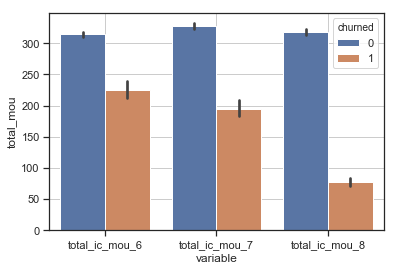

In [110]:
# Relative pattern of Churners and Non churners

sns.barplot(x = 'variable', y = 'total_mou', hue = 'churned', data = churn_total_ic_mou)
plt.grid()
plt.show()

# There is a decreasing trend month on month

The incoming calls trend reduces for churners

In [111]:
# Pattern on the total recharge amount by the customer

churn_total_rech_amt = pd.melt(Telecom_data_Set1[
    ['mobile_number', 'churned', 'total_rech_amt_6', 
     'total_rech_amt_7', 'total_rech_amt_8']], 
                               id_vars = ['mobile_number', 'churned'], value_name = 'total_rech_amt' )
churn_total_rech_amt.head()

mobile_number  churned          variable  total_rech_amt
0     7000701601        1  total_rech_amt_6            1580
1     7001524846        0  total_rech_amt_6             437
2     7002191713        0  total_rech_amt_6             507
3     7000875565        0  total_rech_amt_6             570
4     7000187447        0  total_rech_amt_6             816

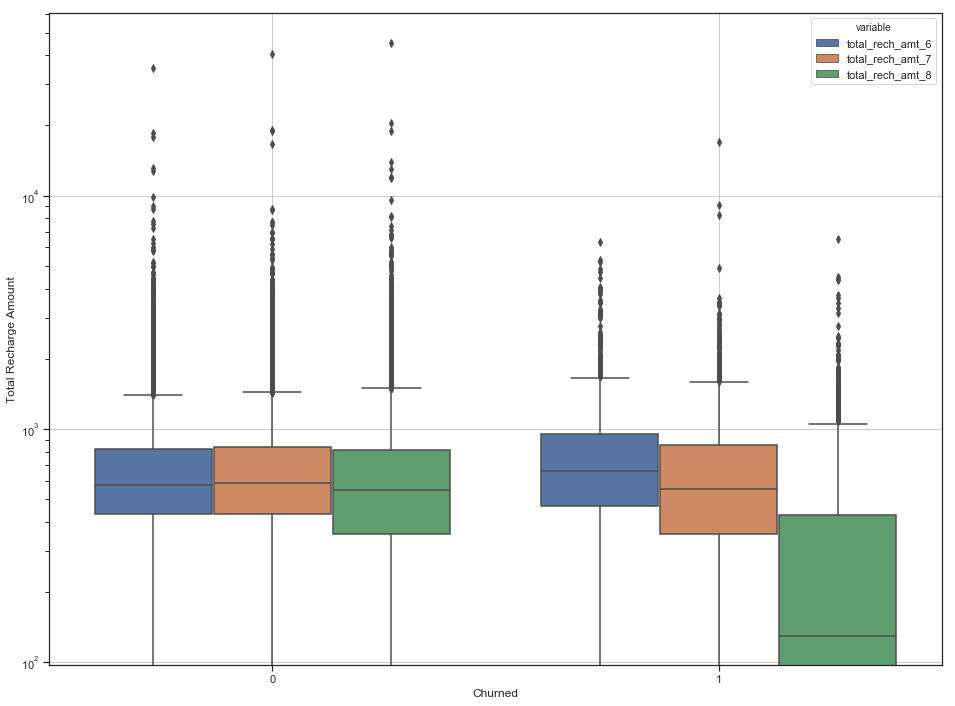

In [112]:
# This plot shows a drastic decline of the total recharge amount in the churned customers where as it stays consistent 
# for non churned customers

plt.figure(figsize = (16,12))
plt.yscale('log')
ax = sns.boxplot(x = 'churned', y = 'total_rech_amt', hue = 'variable', data = churn_total_rech_amt)
ax.set(ylabel = 'Total Recharge Amount', xlabel = 'Churned')
plt.grid()
plt.show()

Shows decline of the total recharge amount in the churned customers where as it stays consistent for non churned customers

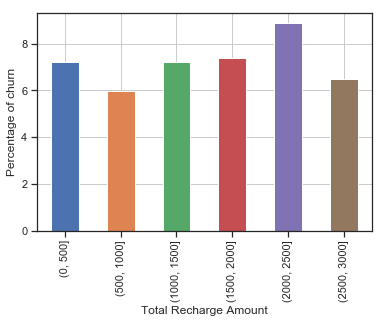

In [113]:
# Does higher recharge amount imply higher churn rate?
# High recharge customers seem to have a higher churn percentage

bins = range(0,3500,500)
fig, ax = plt.subplots()
fig.canvas.draw()

ymarks=[i for i in range(0,14,2)]
ax.set_yticklabels(ymarks)
churn_total_rech_amt.groupby(pd.cut(churn_total_rech_amt['total_rech_amt'], bins=bins)).churned.mean().plot(kind = 'bar')
plt.ylabel('Percentage of churn')
plt.xlabel('Total Recharge Amount')
plt.grid()
plt.show()

In [114]:
# We do not need the above temporary data frames anymore and can be deleted

del churn_total_ic_mou, churn_total_rech_amt

In [115]:
Telecom_data_Set1.shape

(29324, 120)

In [116]:
# We have seen base values and cummalative values so far which are duplicate in nature and got rid of the 
# columns containing base values

# Let us see if there is still any correlation

In [117]:
corr = Telecom_data_Set1.corr()

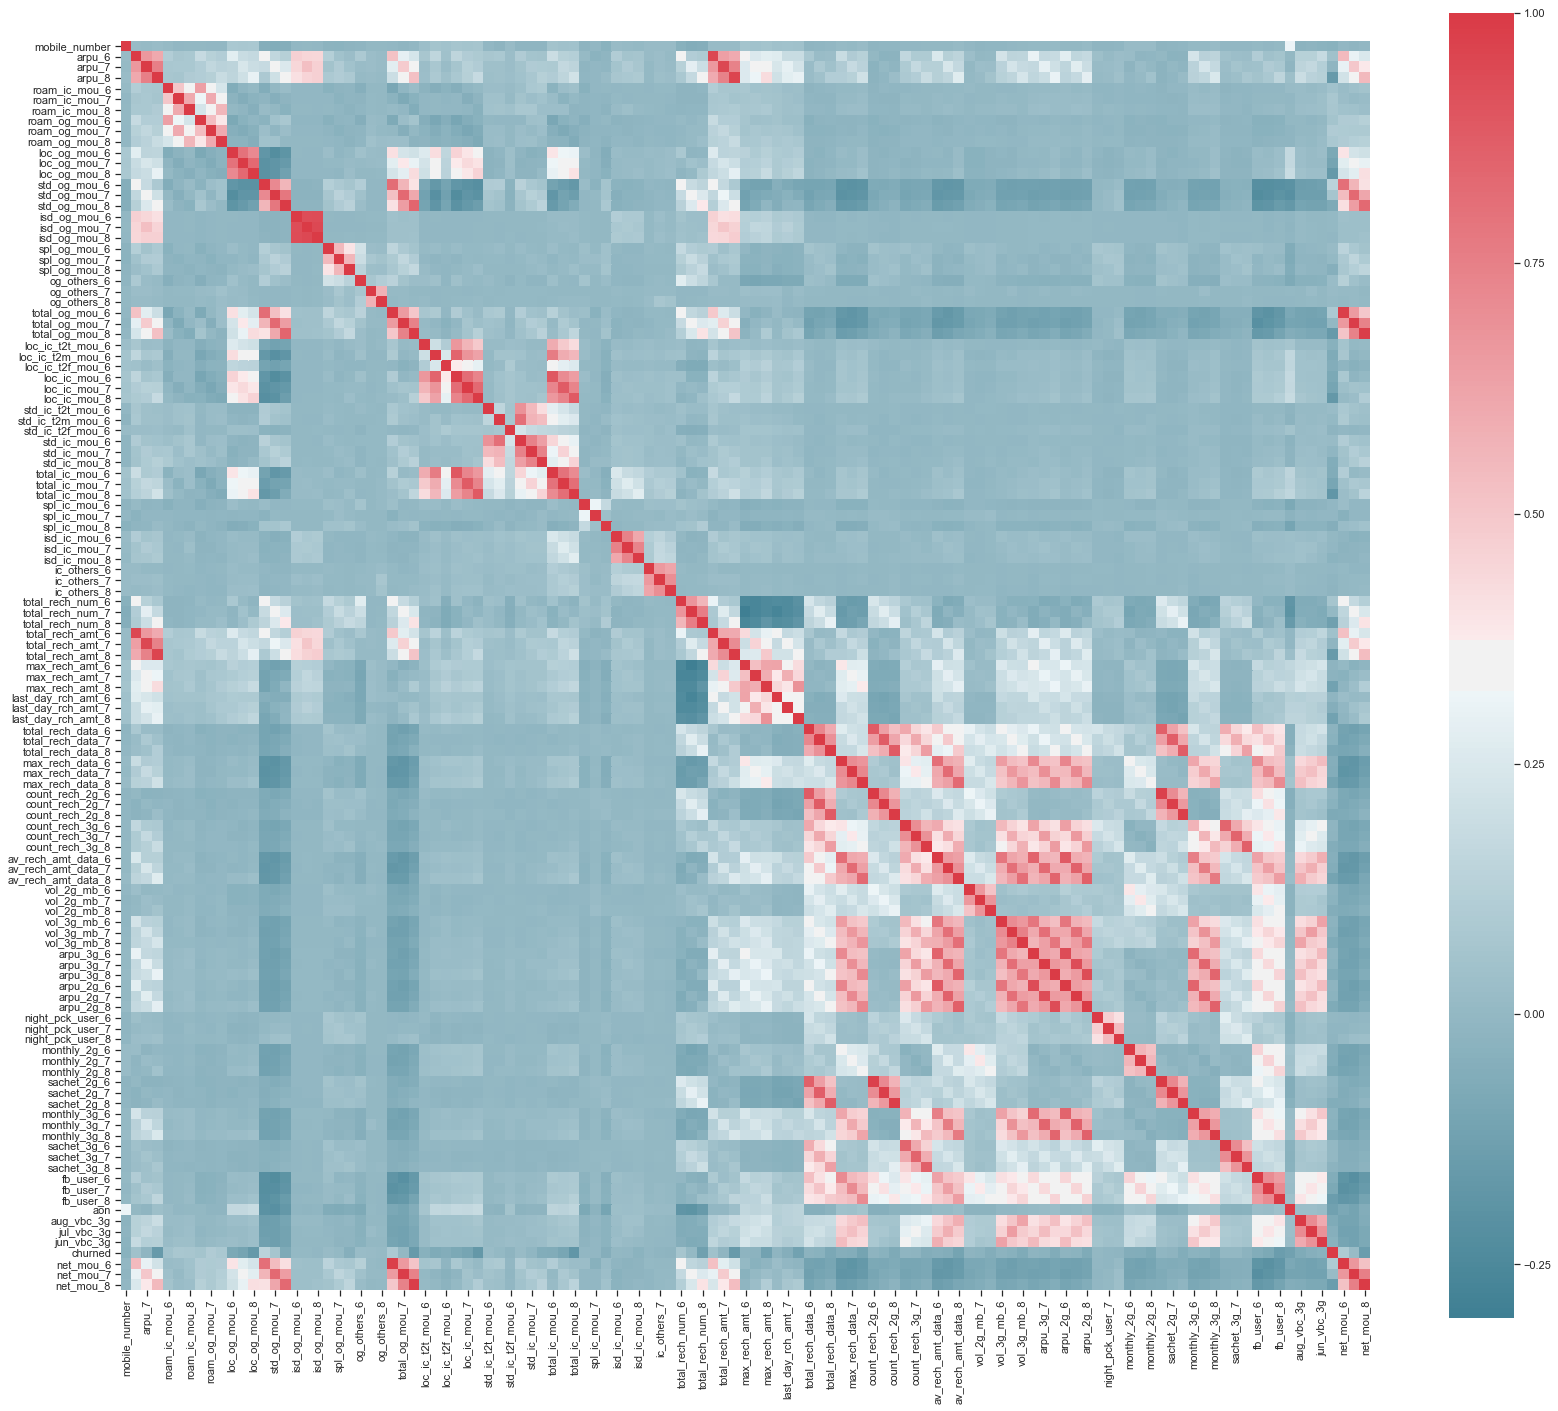

In [118]:
f, ax = plt.subplots(figsize=(28, 24))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.grid()
plt.show()

In [119]:
# To a large extent, we seem to have got rid of the columns having high levels of correlation, though some seem
# to be around. We also still have a huge number of columns remaining and some will need to be eliminated

# We can now rely on PCA for helping with dimensionality reduction

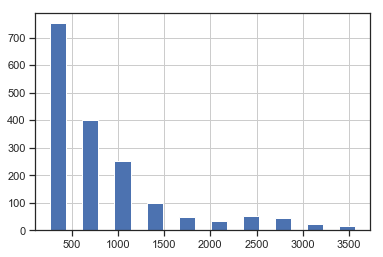

In [120]:
# Plot on Age on Network with the churned customers

plt.hist(Telecom_data_Set2[Telecom_data_Set2['churned'] == 1]['aon'], rwidth = 0.5)
plt.grid()
plt.show()

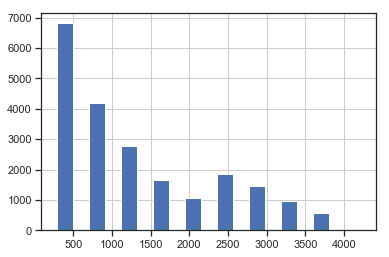

In [121]:
plt.hist(Telecom_data_Set2[Telecom_data_Set2['churned'] == 0]['aon'], rwidth = 0.5)
plt.grid()
plt.show()

This histogram seems to suggest that most of customers that churned have stayed with the network for very few days as opposed to loyal customers. As many as 3500 customers have been with the network for barely 200 days or lesser

The maximum number of days a churned customer has been with the network is a little over 800 days where as a loyal customer customer has been around for nearly 6000 days

longer time ==> lower churn

To prevent customers from churning, there can be promotional offers provided based on the age on network

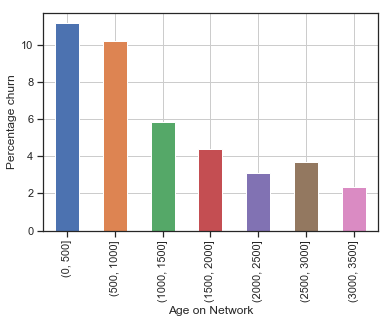

In [122]:
# We notice that the highest churn percentage is with the shortest duration customers

bins = range(0,4000,500)
fig, ax = plt.subplots()
fig.canvas.draw()

ymarks=[i for i in range(0,20,2)]
ax.set_yticklabels(ymarks)
Telecom_data_Set1.groupby(pd.cut(Telecom_data_Set1['aon'], bins=bins)).churned.mean().plot(kind = 'bar')
plt.ylabel('Percentage churn')
plt.xlabel('Age on Network')
plt.grid()
plt.show()

Customers are most uncertain during the initial phase. Once they are over the first year, the rate of churn drops steadily which could be indicative of the level of satisfaction of the customer with the service provider

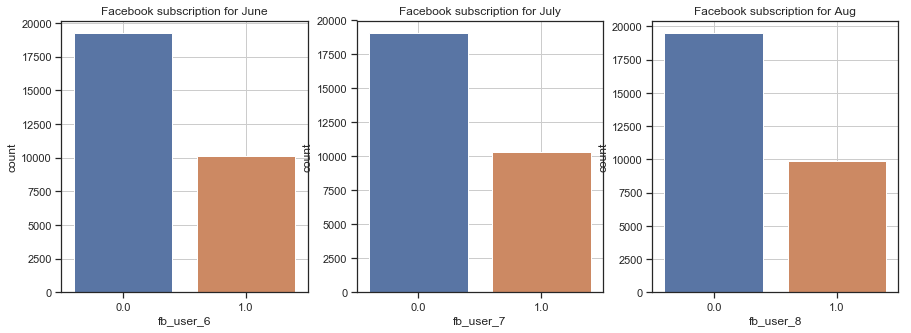

In [123]:
# Pattern on the Facebook service users on the Churners

fb = Telecom_data_Set1[['fb_user_6', 'fb_user_7', 'fb_user_8', 'churned']]

fb = fb.loc[(fb['fb_user_6'] != -1) & (fb['fb_user_7'] != -1) & (fb['fb_user_8'] != -1)]

plt.figure(figsize = (15,5))

plt.subplot(131)
sns.countplot(x = fb.fb_user_6)
plt.title('Facebook subscription for June')
plt.grid()
plt.subplot(132)
sns.countplot(x = fb.fb_user_7)
plt.title('Facebook subscription for July')
plt.grid()
plt.subplot(133)
sns.countplot(x = fb.fb_user_8)
plt.title('Facebook subscription for Aug')
plt.grid()
plt.show()

There are very few customers who did not opt for this service in the month of Aug. There is not much significant change.

In [124]:
# # Pattern on the volume based cost

vbc = pd.melt(Telecom_data_Set1[['mobile_number', 'churned', 'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g']], id_vars = ['mobile_number', 'churned'], value_name = 'total' )

vbc.head()

mobile_number  churned    variable   total
0     7000701601        1  jun_vbc_3g  18.740
1     7001524846        0  jun_vbc_3g 122.160
2     7002191713        0  jun_vbc_3g   0.000
3     7000875565        0  jun_vbc_3g  21.890
4     7000187447        0  jun_vbc_3g   0.000

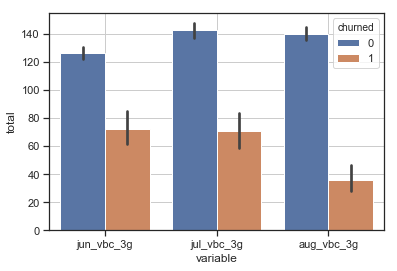

In [125]:
# We see a declining pattern for churners

sns.barplot(x = 'variable', y = 'total', hue = 'churned', data = vbc)
plt.grid()
plt.show()

The customers who churned declined this service in Aug

In [126]:
# Drop the data frame

del vbc

In [127]:
# # Plot to see the pattern with the data service schemes taken month on month

sachet_3g = pd.melt(Telecom_data_Set1[['mobile_number', 'churned', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total' )

sachet_3g.head()

mobile_number  churned     variable  total
0     7000701601        1  sachet_3g_6      0
1     7001524846        0  sachet_3g_6      0
2     7002191713        0  sachet_3g_6      0
3     7000875565        0  sachet_3g_6      0
4     7000187447        0  sachet_3g_6      0

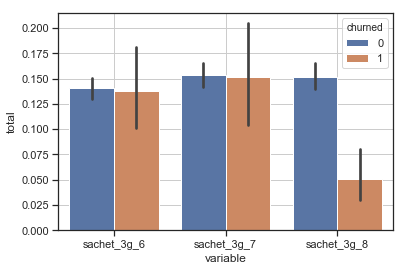

In [128]:
# # There is a decline in the pattern for the churners

sns.barplot(x = 'variable', y = 'total', hue = 'churned', data = sachet_3g)
plt.grid()
plt.show()

 The customers who churned declined this service in Aug

In [129]:
# # Plot to see the pattern with the data service schemes taken month on month

sachet_2g = pd.melt(Telecom_data_Set1[['mobile_number', 'churned', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total_mou' )

sachet_2g.head()

mobile_number  churned     variable  total_mou
0     7000701601        1  sachet_2g_6          0
1     7001524846        0  sachet_2g_6          0
2     7002191713        0  sachet_2g_6          0
3     7000875565        0  sachet_2g_6          0
4     7000187447        0  sachet_2g_6          0

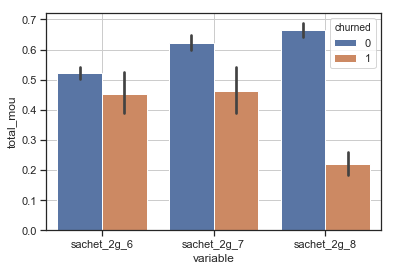

In [130]:
# # We see a decline in the service scheme taken for Churners

sns.barplot(x = 'variable', y = 'total_mou', hue = 'churned', data = sachet_2g)
plt.grid()
plt.show()

Lot of customers who Churned declined this service in august

In [131]:
# # Number of 3G recharges trend month on month with Churners and Non Churners

count_rech_3g = pd.melt(Telecom_data_Set1[['mobile_number', 'churned', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total' )

count_rech_3g.head()

mobile_number  churned         variable  total
0     7000701601        1  count_rech_3g_6  0.000
1     7001524846        0  count_rech_3g_6  0.000
2     7002191713        0  count_rech_3g_6  0.000
3     7000875565        0  count_rech_3g_6  0.000
4     7000187447        0  count_rech_3g_6  0.000

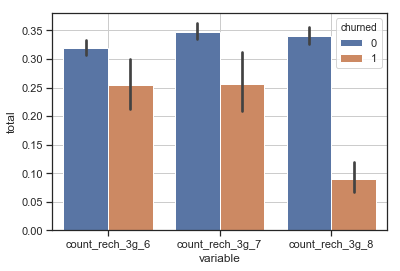

In [132]:
# # There is a decline in Charging with Churners. 

sns.barplot(x = 'variable', y = 'total', hue = 'churned', data = count_rech_3g)
plt.grid()
plt.show()

Customers who churned declined usage of this 3G services in Aug month

In [133]:
# # Number of 2G recharges trend month on month with Churners and Non Churners

count_rech_2g = pd.melt(Telecom_data_Set1[['mobile_number', 'churned', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total' )

count_rech_2g.head()

mobile_number  churned         variable  total
0     7000701601        1  count_rech_2g_6  0.000
1     7001524846        0  count_rech_2g_6  0.000
2     7002191713        0  count_rech_2g_6  0.000
3     7000875565        0  count_rech_2g_6  0.000
4     7000187447        0  count_rech_2g_6  0.000

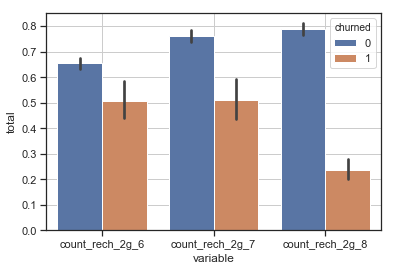

In [134]:
# # There is a decline in Charging with Churners. 

sns.barplot(x = 'variable', y = 'total', hue = 'churned', data = count_rech_2g)
plt.grid()
plt.show()

Customers who churned declined usage of this 2G services in Aug month

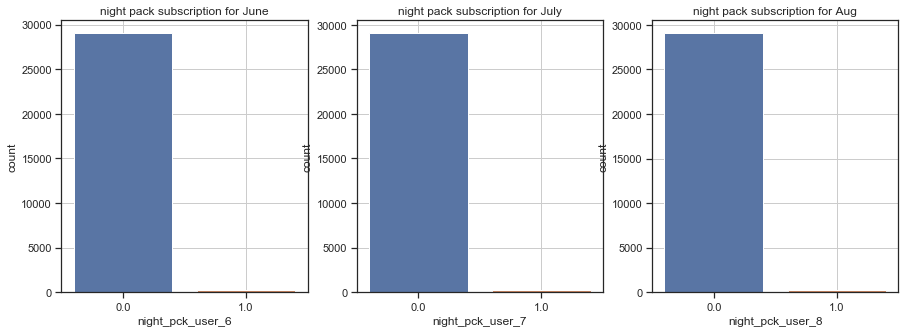

In [135]:
# Observe the Night Service Pack subscriptions column info

# Plot to show the number of subscribers for Night Pack Service

ns = Telecom_data_Set1[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'churned']]

ns = ns.loc[(ns['night_pck_user_6'] != -1) & (ns['night_pck_user_7'] != -1) & (ns['night_pck_user_8'] != -1)]

plt.figure(figsize = (15,5))

plt.subplot(131)
sns.countplot(x = ns.night_pck_user_6)
plt.title('night pack subscription for June')
plt.grid()
plt.subplot(132)
sns.countplot(x = ns.night_pck_user_7)
plt.title('night pack subscription for July')
plt.grid()
plt.subplot(133)
sns.countplot(x = ns.night_pck_user_8)
plt.title('night pack subscription for Aug')
plt.grid()
plt.show()

There seems to be no significant changes with respect to subscriptions to this service

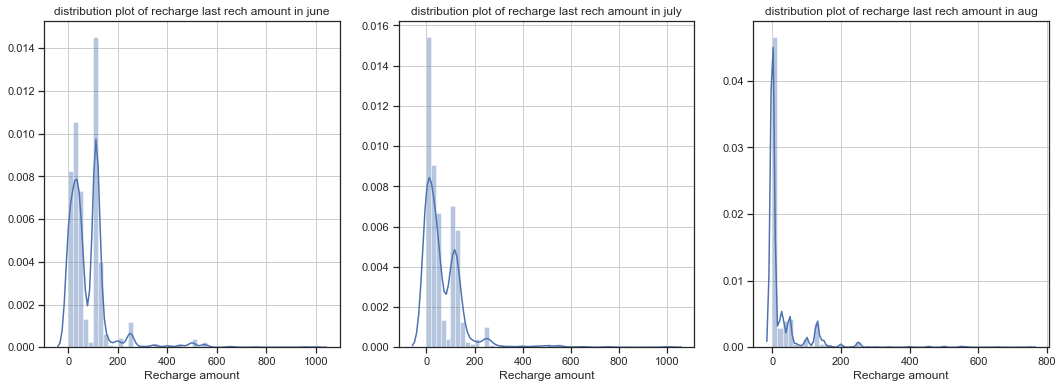

In [136]:
# Distribution of last Recharge Amount

df = Telecom_data_Set2.loc[Telecom_data_Set2['churned']==1]

plt.figure(figsize = (18,6))
plt.subplot(131)
sns.distplot(df['last_day_rch_amt_6'])
plt.xlabel('Recharge amount')
plt.title('distribution plot of recharge last rech amount in june')
plt.grid()
plt.subplot(132)
plt.title('distribution plot of recharge last rech amount in july')
sns.distplot(df['last_day_rch_amt_7'])
plt.xlabel('Recharge amount')
plt.grid()
plt.subplot(133)
sns.distplot(df['last_day_rch_amt_8'])
plt.xlabel('Recharge amount')
plt.title('distribution plot of recharge last rech amount in aug')
plt.grid()
plt.show()

denisty of people who recharged in lower recharge amounts have reduced in the month of august

<Figure size 1080x360 with 0 Axes>

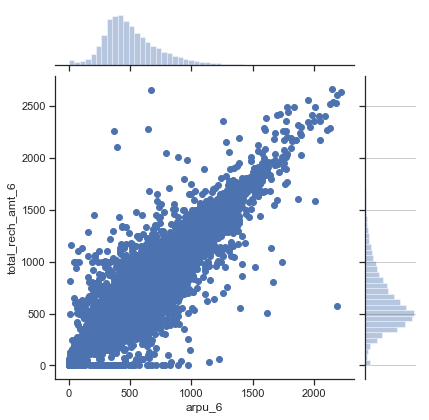

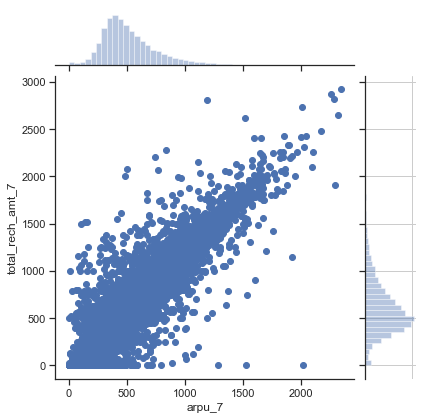

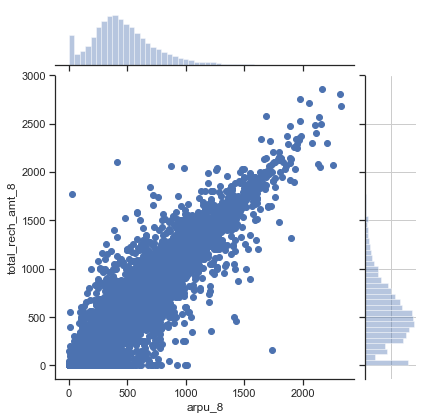

In [137]:
# Relation between ARPU and the total recharge amounts

plt.figure(figsize = (15,5))
sns.jointplot('arpu_6','total_rech_amt_6', data = Telecom_data_Set2)
plt.grid()
plt.show()
sns.jointplot('arpu_7','total_rech_amt_7', data = Telecom_data_Set2)
plt.grid()
plt.show()
sns.jointplot('arpu_8','total_rech_amt_8', data = Telecom_data_Set2)
plt.grid()
plt.show()

The ARPU and Total Recharge amts are linearly related. Alongside we see outliers

We can derive a column 'is_voice' which says if the customer is a Voice User only or Voice and Data User. With this we can find if the churners are more with the Voice Users or Voice and Data Users

In [138]:
# Create new column 'is_voice' to capture information as to if the customer is Voice User only or Voice and Data User

Telecom_data_Set1['is_voice'] = ((Telecom_data_Set1['vol_2g_mb_6']
                                  + Telecom_data_Set1['vol_2g_mb_7']
                                  + Telecom_data_Set1['vol_2g_mb_8']
                                  + Telecom_data_Set1['vol_3g_mb_6']
                                  + Telecom_data_Set1['vol_3g_mb_7']
                                  + Telecom_data_Set1['vol_3g_mb_8'])==0)
Telecom_data_Set1['is_voice'] = Telecom_data_Set1['is_voice'].map({True: 1,False : 0})

In [139]:
Telecom_data_Set1['is_voice'].value_counts()

1    15716
0    13608
Name: is_voice, dtype: int64

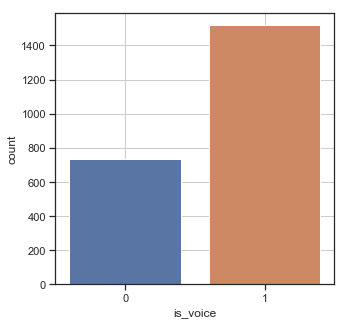

In [140]:
# Find the Churners ratio

df = Telecom_data_Set1.loc[Telecom_data_Set1['churned']==1]

plt.figure(figsize=(5,5))
sns.countplot(x=(df['is_voice']) )
plt.grid()
plt.show()

We see that Customers using just the Voice service tend to Churn. We may possibly infer that customers who use more than one service tend to be loyal

### ** Derived Columns - The last Recharge date variables ** : Convert the date to the day of recharge and drop the date columns

In [141]:
from datetime import datetime

def f(x):
    dt_str = x['date_of_last_rech_6']
    dt_obj = datetime.strptime(dt_str, '%m/%d/%Y')
    return(dt_obj.day)
Telecom_data_Set1['rech_day_6'] = Telecom_data_Set1.apply(f, axis=1)

def f(x):
    dt_str = x['date_of_last_rech_7']
    dt_obj = datetime.strptime(dt_str, '%m/%d/%Y')
    return(dt_obj.day)
Telecom_data_Set1['rech_day_7'] = Telecom_data_Set1.apply(f, axis=1)

def f(x):
    dt_str = x['date_of_last_rech_8']
    dt_obj = datetime.strptime(dt_str, '%m/%d/%Y')
    return(dt_obj.day)
Telecom_data_Set1['rech_day_8'] = Telecom_data_Set1.apply(f, axis=1)

In [142]:
# Drop the date columns

Telecom_data_Set1.drop(['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

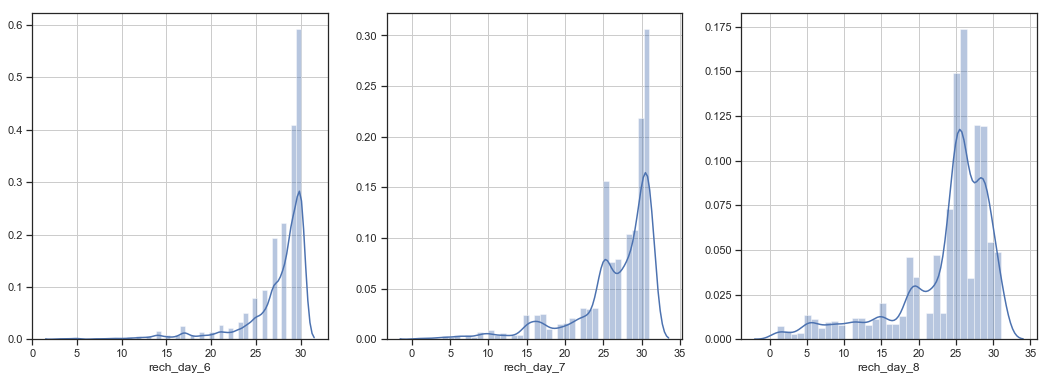

In [143]:
# Recharge days distribution

date_churned = Telecom_data_Set1.loc[Telecom_data_Set1['churned']==1]

plt.figure(figsize = (18,6))
plt.subplot(131)
plt.grid()
sns.distplot(date_churned['rech_day_6'])
plt.subplot(132)
plt.grid()
sns.distplot(date_churned['rech_day_7'])
plt.subplot(133)
plt.grid()
sns.distplot(date_churned['rech_day_8'])
plt.show()

There is a certain pattern difference from 6th to 8th month

### Check the churn rate

In [144]:
((Telecom_data_Set1['churned'].value_counts())/len(Telecom_data_Set1.index))*100

0   92.320
1    7.680
Name: churned, dtype: float64

In [145]:
T_backup = Telecom_data_Set1.copy()

In [146]:
# Identify all the columns that are categorical in nature with less than a certain number of distinct values, 6 here
churn_categorical = []
num_distinct_vals = 3 # Can be changed if essential

for column_name in Telecom_data_Set1.columns:
    if Telecom_data_Set1[column_name].nunique() <= num_distinct_vals and column_name != 'churned':
        churn_categorical.append(column_name)
        
        
print(churn_categorical)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'is_voice']


In [147]:
# The individual values for each of the categorical columns need to be replaced with the churn rate that is churns/non churns
# associated with them before applying PCA

In [148]:
# Before applying the logic
Telecom_data_Set1[churn_categorical].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
7              0.000             0.000             0.000      0.000   
8              0.000             0.000             0.000      0.000   
13             0.000             0.000             0.000      0.000   
16             0.000             0.000             0.000      0.000   
17             0.000             0.000             0.000      0.000   

    fb_user_7  fb_user_8  is_voice  
7       0.000      0.000         1  
8       1.000      1.000         0  
13      0.000      1.000         0  
16      0.000      0.000         1  
17      0.000      0.000         1

In [149]:
# Lets take a temp dataframe of churn to use for the read only purpose
temp = Telecom_data_Set1.copy()

In [150]:
# Calculate and enter the categorical values to their respective churns/non-churns

for col in churn_categorical:
    for cat in temp[col].unique():
        cat_churn_rate =((float(len((temp.loc[(temp['churned'] == 1) & (temp[col] == cat)]).index)))/
                         (float(len(temp.loc[temp[col] == cat]))))
        Telecom_data_Set1.loc[Telecom_data_Set1[col] == cat, col] = cat_churn_rate

In [151]:
Telecom_data_Set1[churn_categorical].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
7              0.077             0.077             0.077      0.089   
8              0.077             0.077             0.077      0.089   
13             0.077             0.077             0.077      0.089   
16             0.077             0.077             0.077      0.089   
17             0.077             0.077             0.077      0.089   

    fb_user_7  fb_user_8  is_voice  
7       0.092      0.104     0.097  
8       0.048      0.023     0.054  
13      0.092      0.023     0.054  
16      0.092      0.104     0.097  
17      0.092      0.104     0.097

### EDA Findings ###############################################################

#### 1. ARPU (Average Revenue per User) is mostly in range of 0-2000
#### 2. There are many fairly new customers compared to long time customers
#### 3. Churners are relatively fewer among the long time customers and are loyal 
#### 4. There are extereme outliers in data, but getting rid of them will amount to loss of data
#### 5. A number of metrics such as ARPU, minutes of usage, net usage show a significant decline among churners as opposed to non churners
#### 6. Most churners are recent customers, longer time ==> lower churn . By providing promotional offers, recent customers may be retained
#### 7. Customers are most uncertain during the initial phase. Once they are over the first year, the rate of churn drops steadily which could be indicative of the level of satisfaction of the customer with the service provider
#### 8. We see that Customers using just the Voice service tend to Churn. We may possibly infer that customers who use more than one service tend to be loyal

## ** Exploratory Data Analysis **is completed and we proceed for Classification Model Generation

 We have seen in the EDA phase that there are lot of correlated variables. 
There are more than 100 variables in the dataset. 
Lets carry out PCA and identify Principal Analysis Components to handle the dimensionality reduction. It also addresses correlation.

### Splitting the Data into training and test dataset

In [152]:
# Putting feature variables to X
X = Telecom_data_Set1.drop(['mobile_number','churned'],axis=1)

# Putting response variable to y
y = Telecom_data_Set1['churned']

### Feature Standardisation

In [153]:
# Scaling the data

standard_scaler = StandardScaler()

In [154]:
X = pd.DataFrame(standard_scaler.fit_transform(X), columns = X.columns)

In [155]:
X.head()

arpu_6  arpu_7  arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0   1.116   1.636   5.345         -0.015          0.259          0.241   
1  -0.478  -0.219  -0.825         -0.220         -0.178         -0.179   
2  -0.214  -0.839   0.102          0.077          1.704          0.778   
3  -0.357  -0.635  -0.722         -0.220         -0.141         -0.179   
4   0.241  -1.243  -1.052         -0.220         -0.116         -0.115   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  \
0         -0.046         -0.098          0.151         0.368         0.660   
1         -0.247         -0.226         -0.204         0.252         0.007   
2         -0.180          0.131         -0.190        -0.203        -0.617   
3         -0.247         -0.046         -0.204         0.088        -0.186   
4         -0.247         -0.140         -0.079        -0.487        -0.759   

   loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0        -0.023        -0.554        -0.538        -0.455        -0.048   
1        -0.549        -0.439        -0.431        -0.422        -0.048   
2         0.245         0.510        -0.438         0.480        -0.048   
3        -0.159        -0.603        -0.550        -0.546        -0.048   
4        -0.722         1.250        -0.654        -0.581        -0.048   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0        -0.044         0.175        -0.076        -0.322        -0.022   
1        -0.048        -0.046        -0.317        -0.322         0.139   
2        -0.048        -0.017        -0.317        -0.322        -0.096   
3        -0.048        -0.046        -0.317        -0.182        -0.047   
4        -0.048        -0.046        -0.179        -0.322        -0.303   

   og_others_6  og_others_7  og_others_8  total_og_mou_6     ...      \
0       -0.304       -0.017       -0.018          -0.303     ...       
1       -0.304       -0.017       -0.018          -0.271     ...       
2       -0.304       -0.017       -0.018           0.338     ...       
3       -0.304       -0.017       -0.018          -0.517     ...       
4        0.104       -0.017       -0.018           0.860     ...       

   monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  \
0        -0.342        -0.324       -0.295       -0.312       -0.334   
1         2.223        -0.324       -0.295        0.200        1.259   
2        -0.342        -0.324       -0.295       -0.312        1.259   
3        -0.342        -0.324       -0.295       -0.312       -0.334   
4        -0.342        -0.324       -0.295       -0.312       -0.334   

   monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
0        -0.303        -0.300        -0.301       -0.159       -0.156   
1        -0.303        -0.300        -0.301       -0.159       -0.156   
2        -0.303        -0.300        -0.301       -0.159       -0.156   
3        -0.303        -0.300        -0.301       -0.159       -0.156   
4        -0.303        -0.300        -0.301       -0.159       -0.156   

   sachet_3g_8  fb_user_6  fb_user_7  fb_user_8    aon  aug_vbc_3g  \
0       -0.146      0.725      0.736      0.712 -0.474      -0.189   
1       -0.146      0.725     -1.359     -1.404 -0.974      -0.282   
2       -0.146      0.725      0.736     -1.404  1.380      -0.335   
3       -0.146      0.725      0.736      0.712 -0.773      -0.335   
4       -0.146      0.725      0.736      0.712 -0.613      -0.335   

   jul_vbc_3g  jun_vbc_3g  net_mou_6  net_mou_7  net_mou_8  is_voice  \
0      -0.286      -0.264     -0.308     -0.162     -0.397     0.931   
1       1.882       0.000     -0.312     -0.440     -0.698    -1.075   
2      -0.333      -0.312      0.308     -0.739      0.532    -1.075   
3      -0.327      -0.256     -0.558     -0.627     -0.608     0.931   
4      -0.333      -0.312      0.814     -1.058     -0.928     0.931   

   rech_day_6  rech_day_7  r

### Splitting Data into Training and Test Sets

In [156]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [157]:
# Since there is class imbalance, SMOTE technique is used for sythetic sampling

In [158]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1601
Before OverSampling, counts of label '0': 18925 



### Carry out oversampling to handle the class imbalance using SMOTE

** Important **: Please note that the oversampling would be applied only on the training data. Predictions on the test data will be carried out without any manipulation. This is to ensure that the algorithms are not mislead in anyway

In [159]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [160]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [161]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (37850, 119)
After OverSampling, the shape of train_y: (37850,) 



In [162]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 18925
After OverSampling, counts of label '0': 18925


** Inference ** : As can be noticed from the above the percentage of churners is now more skewed, but by applying SMOTE technique for oversampling, the percentage is equal between churners and non churners thus handling class imbalance causing incorrect predictions

In [163]:
# Renaming the datsets
# Here X_train and y_train are given the values from the SMOTE (Oversampling) technique

X_train_non_pca = X_train.copy()
y_train_non_pca = y_train.copy()

X_train = X_train_res
y_train = y_train_res

** Step 1: ** Carry out over-sampling to address class imbalance

** Step 2: ** Implement PCA to achieve dimensionality reduction

** Step 3: ** Apply various ML algorithms to identify the one with highest recall percentage

## PCA on Data

In [164]:
X_train.shape

(37850, 119)

In [165]:
# Carry out PCA for dimensionality reduction

pca = PCA(svd_solver='randomized', random_state=42)

In [166]:
#Doing the PCA on the train data after carrying out over sampling

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them

In [167]:
pca.components_

array([[ 3.46717821e-02,  5.80467059e-02,  7.48560110e-02, ...,
        -5.58790010e-02, -8.18266314e-03,  2.78418712e-03],
       [ 1.92630687e-01,  2.22170164e-01,  1.95754779e-01, ...,
         5.77826041e-02,  9.56046362e-02,  8.13889067e-02],
       [-5.01602400e-02, -4.60525750e-02, -4.12999429e-02, ...,
         9.82935345e-02,  1.01711087e-01,  6.35449065e-02],
       ...,
       [-0.00000000e+00, -1.30661786e-16, -1.78281236e-16, ...,
         5.16471908e-18, -2.95499179e-18, -1.20985699e-17],
       [-0.00000000e+00,  6.64572310e-17, -1.77590991e-16, ...,
        -9.29201955e-18,  7.27586625e-17,  8.10656077e-17],
       [ 0.00000000e+00,  1.04954301e-16,  2.06517450e-17, ...,
         1.65119079e-17,  4.11046884e-17, -3.91909527e-17]])

In [168]:
colnames = list(X_train_non_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(113)

PC1    PC2             Feature
0    0.035  0.193              arpu_6
1    0.058  0.222              arpu_7
2    0.075  0.196              arpu_8
3    0.001  0.024       roam_ic_mou_6
4   -0.001  0.018       roam_ic_mou_7
5    0.001  0.038       roam_ic_mou_8
6   -0.009  0.034       roam_og_mou_6
7   -0.013  0.041       roam_og_mou_7
8   -0.007  0.063       roam_og_mou_8
9    0.026  0.100        loc_og_mou_6
10   0.030  0.114        loc_og_mou_7
11   0.039  0.108        loc_og_mou_8
12  -0.114  0.203        std_og_mou_6
13  -0.090  0.229        std_og_mou_7
14  -0.037  0.175        std_og_mou_8
15   0.011  0.044        isd_og_mou_6
16   0.016  0.052        isd_og_mou_7
17   0.012  0.049        isd_og_mou_8
18  -0.006  0.054        spl_og_mou_6
19  -0.005  0.076        spl_og_mou_7
20   0.003  0.057        spl_og_mou_8
21  -0.017  0.039         og_others_6
22   0.003  0.070         og_others_7
23   0.002  0.057         og_others_8
24  -0.090  0.249      total_og_mou_6
25  -0.067  0.283      total_og_mou_7
26  -0.011  0.222      total_og_mou_8
27   0.020  0.042    loc_ic_t2t_mou_6
28   0.034  0.057    loc_ic_t2m_mou_6
29   0.027  0.023    loc_ic_t2f_mou_6
30   0.038  0.065        loc_ic_mou_6
31   0.043  0.079        loc_ic_mou_7
32   0.052  0.077        loc_ic_mou_8
33   0.004  0.068    std_ic_t2t_mou_6
34   0.002  0.051    std_ic_t2m_mou_6
35   0.010  0.013    std_ic_t2f_mou_6
36   0.005  0.076        std_ic_mou_6
37   0.010  0.074        std_ic_mou_7
38   0.018  0.066        std_ic_mou_8
39   0.038  0.088      total_ic_mou_6
40   0.045  0.101      total_ic_mou_7
41   0.055  0.096      total_ic_mou_8
42  -0.005  0.006        spl_ic_mou_6
43   0.002 -0.001        spl_ic_mou_7
44   0.002  0.017        spl_ic_mou_8
45   0.014  0.007        isd_ic_mou_6
46   0.019  0.017        isd_ic_mou_7
47   0.017  0.017        isd_ic_mou_8
48   0.002  0.005         ic_others_6
49   0.004  0.008         ic_others_7
50   0.005  0.010         ic_others_8
51  -0.045  0.103    total_rech_num_6
52  -0.021  0.135    total_rech_num_7
53   0.004  0.130    total_rech_num_8
54   0.032  0.186    total_rech_amt_6
55   0.055  0.215    total_rech_amt_7
56   0.073  0.188    total_rech_amt_8
57   0.104  0.044      max_rech_amt_6
58   0.105  0.056      max_rech_amt_7
59   0.112  0.093      max_rech_amt_8
60   0.082  0.044  last_day_rch_amt_6
61   0.076  0.051  last_day_rch_amt_7
62   0.071  0.065  last_day_rch_amt_8
63   0.118 -0.021   total_rech_data_6
64   0.122 -0.012   total_rech_data_7
65   0.099  0.009   total_rech_data_8
66   0.200 -0.014     max_rech_data_6
67   0.204 -0.006     max_rech_data_7
68   0.179  0.012     max_rech_data_8
69   0.065 -0.028     count_rech_2g_6
70   0.067 -0.020     count_rech_2g_7
71   0.054 -0.000     count_rech_2g_8
72   0.137  0.001     count_rech_3g_6
73   0.143  0.008     count_rech_3g_7
74   0.118  0.019     count_rech_3g_8
75   0.194 -0.010  av_rech_amt_data_6
76   0.200  0.002  av_rech_amt_data_7
77   0.176  0.018  av_rech_amt_data_8
78   0.064 -0.021         vol_2g_mb_6
79   0.061 -0.018         vol_2g_mb_7
80   0.053 -0.006         vol_2g_mb_8
81   0.160 -0.001         vol_3g_mb_6
82   0.174  0.009         vol_3g_mb_7
83   0.153  0.021         vol_3g_mb_8
84   0.176  0.007           arpu_3g_6
85   0.181  0.018           arpu_3g_7
86   0.156  0.027           arpu_3g_8
87   0.179  0.003           arpu_2g_6
88   0.186  0.015           arpu_2g_7
89   0.161  0.024           arpu_2g_8
90  -0.026 -0.006    night_pck_user_6
91  -0.028 -0.003    night_pck_user_7
92  -0.026 -0.015    night_pck_user_8
93   0.055 -0.020        monthly_2g_6
94   0.057 -0.015        monthly_2g_7
95   0.052 -0.006        monthly_2g_8
96   0.054 -0.024         sachet_2g_6
97   0.056 -0.017         sachet_2g_7
98   0.045  0.001         sachet_2g_8
99   0.149  0.004        monthly_3g_6
100  0.149  0.013        monthly_3g_7
101  0.133  0.021        monthly_3g_8
102  0.069 -0.001         sachet_3g_6
103  0.078  0.002         sachet_3g_7
104  0.060  0.011

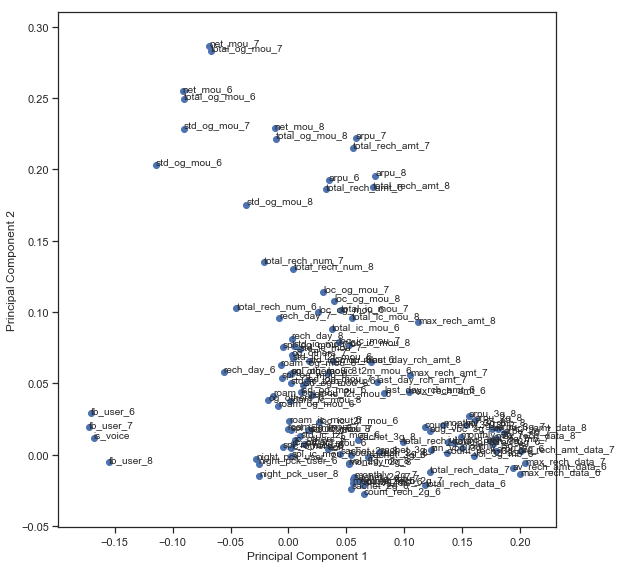

In [169]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [170]:
pca.explained_variance_ratio_

array([1.38354235e-01, 7.92508804e-02, 6.54885119e-02, 5.68665358e-02,
       5.10608871e-02, 4.63219230e-02, 3.77531044e-02, 3.03818402e-02,
       3.00431840e-02, 2.49972957e-02, 2.00696949e-02, 1.83250148e-02,
       1.81781274e-02, 1.72131649e-02, 1.65899253e-02, 1.55157506e-02,
       1.39031635e-02, 1.24243245e-02, 1.17827301e-02, 1.15343401e-02,
       1.13646093e-02, 1.04169553e-02, 1.02138729e-02, 1.01365370e-02,
       9.73144105e-03, 9.57671352e-03, 9.00140666e-03, 8.73909158e-03,
       8.56638235e-03, 7.69042078e-03, 7.25622476e-03, 6.96694348e-03,
       6.78390813e-03, 6.64278145e-03, 6.52136823e-03, 6.34666345e-03,
       6.11363766e-03, 5.99984919e-03, 5.85409939e-03, 5.63303907e-03,
       5.45621759e-03, 5.36699994e-03, 5.23801636e-03, 5.09937154e-03,
       4.89100532e-03, 4.77231036e-03, 4.54932270e-03, 4.12656789e-03,
       4.11543650e-03, 3.92730893e-03, 3.83614615e-03, 3.65334689e-03,
       3.27018439e-03, 3.19308458e-03, 3.08387956e-03, 2.98986537e-03,
      

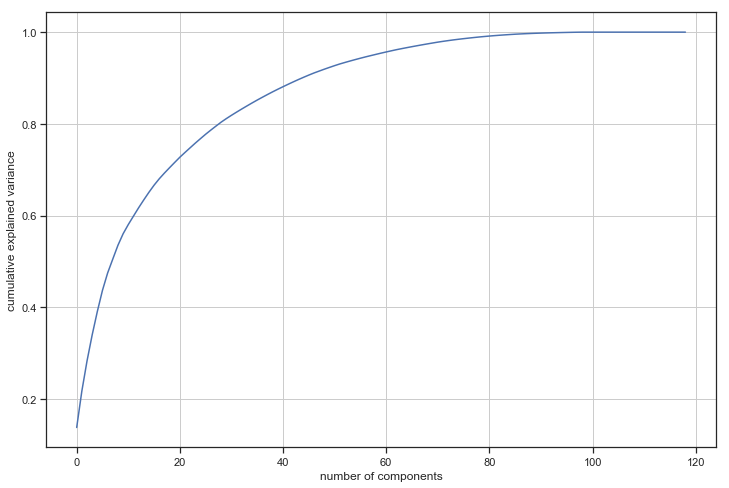

In [171]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

#### From the graph it looks like 45 components are enough to describe 90% of the variance in the dataset
We'll choose 45 components for our modeling.
#### Lets check how many are required from the PCA module

In [172]:
# Invoke PCA for the required variance. If you need a different variance change it here.

pca_final = PCA(0.90)


#### Basis transformation - getting the data onto our PCs

In [173]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(37850, 45)

### ** Observation **: Note the reduction in dimensionality. We will be considering only 45 dimensions now for 90% variance.

#### Confirm to see that PCA transformed data is not correlated

In [174]:
#creating correlation matrix for the data

corrmat = np.corrcoef(df_train_pca.transpose())

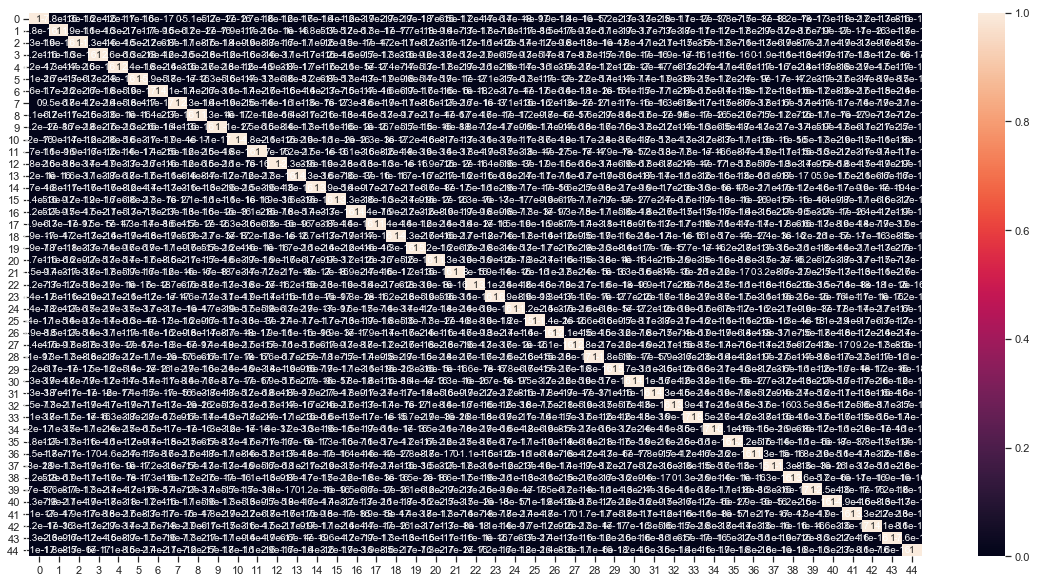

In [175]:
# Plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [176]:
# 1s -> 0s in diagonals

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 1.3143581921042455e-15 , min corr:  -1.2260966483607902e-15


** Observation **: We see that correlations are indeed very close to 0.
We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [177]:
#Applying selected components to the test data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8798, 45)

In [178]:
# Adding the following lines of code to tabulate results from the various algos, compare and contrast to determine
# the best performing algorithm to identify the churners

In [179]:
model_results = pd.DataFrame([['Logistic Regression', 0, 0], 
                              ['SVM', 0, 0], ['Decision Tree', 0, 0], 
                              ['Random Forests', 0, 0],
                              ['Ada Boost', 0, 0]], columns = ['Algorithm', 'Accuracy', 'Recall'])


# Part 1: Build Model to Predict Customers who will Churn

### We will be evaluating the Sensitivity of the Model to know the Churners Predictive Power. Sensitivity metric in sklearn is Recall.

### Oversampling has been carried out to handle the class imbalance associated with churn percentage

# ** Method 1 : **  Building Logistic Regression Model with the PCA Data 

In [180]:
#performing logistic regression on the transformed data

lr_pca = LogisticRegression()

#fitting the model with transformed training data
lr_pca.fit(df_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
#predicting on the test data using the model
# we will convert the prediction into a dataframe so that further analysis can be done 
y_pred_pca = pd.DataFrame(lr_pca.predict_proba(df_test_pca)).iloc[:,[1]]
y_pred_pca.head()

1
0 0.628
1 0.053
2 0.130
3 0.141
4 0.882

In [182]:
#renaming the columns
y_pred_pca.rename(columns = {1 : 'pca_churn_prob'}, inplace = True)
y_pred_pca.head()

pca_churn_prob
0           0.628
1           0.053
2           0.130
3           0.141
4           0.882

In [183]:
y_test_df = pd.DataFrame(y_test)
y_test_df['pr_index'] = y_test_df.index
y_test_df.reset_index(inplace=True, drop = True)
y_test_df.head()

churned  pr_index
0        0     53534
1        0     42998
2        0     39743
3        1     86022
4        1      7890

In [184]:
#y_test structure
y_test.head()

53534    0
42998    0
39743    0
86022    1
7890     1
Name: churned, dtype: int64

In [185]:
#concat of y_test and y_pred_pca
y_pca_result = pd.concat([y_test_df, y_pred_pca], axis =1)
y_pca_result = y_pca_result.reindex_axis(['pr_index', 'churned', 'pca_churn_prob'], axis =1)
y_pca_result.head()

pr_index  churned  pca_churn_prob
0     53534        0           0.628
1     42998        0           0.053
2     39743        0           0.130
3     86022        1           0.141
4      7890        1           0.882

In [186]:
num = [float(x)/10 for x in range(10)]

for i in num:
    y_pca_result[i] = y_pca_result['pca_churn_prob'].apply(lambda x: 1 if x > i else 0)
    
y_pca_result.sample(10)

pr_index  churned  pca_churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
6835     70262        0           0.301    1    1    1    1    0    0    0   
8392     33755        0           0.119    1    1    0    0    0    0    0   
7245     85156        0           0.014    1    0    0    0    0    0    0   
3155     18841        0           0.309    1    1    1    1    0    0    0   
3264     60117        0           0.135    1    1    0    0    0    0    0   
6655     36098        0           0.037    1    0    0    0    0    0    0   
7999     33805        0           0.814    1    1    1    1    1    1    1   
565      23100        0           0.019    1    0    0    0    0    0    0   
6055     33998        0           0.174    1    1    0    0    0    0    0   
464       1491        0           0.481    1    1    1    1    1    0    0   

      0.7  0.8  0.9  
6835    0    0    0  
8392    0    0    0  
7245    0    0    0  
3155    0    0    0  
3264    0    0    0  
6655    0    0    0  
7999    1    1    0  
565     0    0    0  
6055    0    0    0  
464     0    0    0

In [187]:
# creating a dataframe with accuracy, sensitivity and specificity
pca_results = pd.DataFrame(columns = ['pca_churn_prob', 'accuracy', 'sensitivity', 'specificity'])

for i in num:
    cm1 = metrics.confusion_matrix(y_pca_result['churned'], y_pca_result[i])
    accuracy = metrics.accuracy_score(y_pca_result['churned'], y_pca_result[i])
    sensitivity = cm1[0,0]/float(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/float(cm1[1,1]+cm1[1,0])
    
    pca_results.loc[i] = [i, accuracy, sensitivity, specificity]
pca_results

pca_churn_prob  accuracy  sensitivity  specificity
0.000           0.000     0.074        0.000        1.000
0.100           0.100     0.434        0.392        0.951
0.200           0.200     0.582        0.555        0.919
0.300           0.300     0.684        0.668        0.886
0.400           0.400     0.760        0.753        0.849
0.500           0.500     0.822        0.823        0.813
0.600           0.600     0.867        0.875        0.760
0.700           0.700     0.895        0.912        0.677
0.800           0.800     0.916        0.946        0.550
0.900           0.900     0.926        0.976        0.295

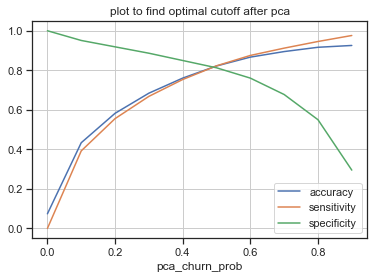

In [188]:
#plot to find the optimal cutoff
pca_results.plot.line(x = 'pca_churn_prob',y = ['accuracy','sensitivity','specificity'])
plt.title('plot to find optimal cutoff after pca')
plt.grid()

**Inference**: based on the plots above, we set the cutoff as 0.5

### Final - Logistic Regression Model with cutoff as 0.5

In [189]:
pca_results.loc[pca_results['pca_churn_prob'] == 0.5]

pca_churn_prob  accuracy  sensitivity  specificity
0.500           0.500     0.822        0.823        0.813

In [190]:
y_test_final = y_test_df.drop('pr_index', axis =1)

In [191]:
#findin the area under the curve
y_pred_final = lr_pca.predict_proba(df_test_pca)[:,1]
print(metrics.roc_auc_score(y_test_final,y_pred_final))

0.8773170865530214


In [192]:
#confusion matrix after PCA
cm = metrics.confusion_matrix(y_test_final, y_pca_result[0.5])
cm

array([[6701, 1446],
       [ 122,  529]], dtype=int64)

In [193]:
metrics.accuracy_score(y_test_final, y_pca_result[0.5])

0.8217776767447147

In [194]:
metrics.recall_score(y_test_final, y_pca_result[0.5])

0.8125960061443932

** Inference **: By applying logistic regression, the recall percentage obtained is 84.8%

### By applying SMOTE on the training data, we were able to improve the percentage of churners 

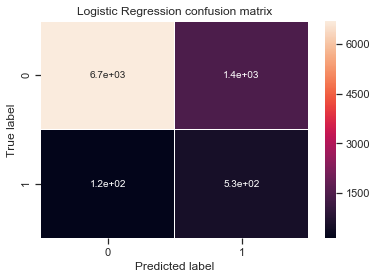

In [195]:
sns.heatmap(cm, annot = True,  linewidths=.5)
plt.title('Logistic Regression confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

### ** Observation ** : We consider the Senvitivity Metric in order to know the percentage of Churners and it is fairly good with 84.8 %

In [196]:
# Updating the results in the model_results dataframe to enable comparison

In [197]:
model_results.loc[model_results['Algorithm'] == 'Logistic Regression', 'Accuracy'] = metrics.accuracy_score(y_test_final, y_pca_result[0.5]) * 100 

In [198]:
model_results.loc[model_results['Algorithm'] == 'Logistic Regression', 'Recall'] = metrics.recall_score(y_test_final, y_pca_result[0.5]) * 100

# Method 2 : Building SVM Model

### ** The SVM Model will take a lot of time to execute. 

In [199]:
# model = SVC(C = 10, kernel='rbf')
# model.fit(df_train_pca, y_train)

In [200]:
# y_pred = model.predict(df_test_pca)

In [201]:
# confusion matrix
# metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [202]:
# metrics.recall_score(y_true=y_test, y_pred=y_pred)

** Observation **: Not good Sensitivity with SVC with C=10 and Kernel Radial

### Grid Search to find the optimal hyperparameters 

In [203]:
# creating a KFold object with 3 splits ( Took 38.4 Min)
# folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
# hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
#                     'C': [1, 10, 100]}]


# specify model
# model = SVC(kernel="rbf")

# set up GridSearchCV()
# model_cv = GridSearchCV(estimator = model, 
#                        param_grid = hyper_params, 
#                        scoring= 'recall', 
#                        cv = folds, 
#                        verbose = 1,
#                        return_train_score=True)      

# fit the model
# model_cv.fit(df_train_pca, y_train)

In [204]:
# cv results
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results.head()

In [205]:
# converting C to numeric type for plotting on x-axis
# cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
# plt.figure(figsize=(16,6))

# subplot 1/3
# plt.subplot(131)
# gamma_01 = cv_results[cv_results['param_gamma']==0.01]

# plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
# plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
# plt.xlabel('C')
# plt.ylabel('Recall')
# plt.title("Gamma=0.01")
# plt.ylim([0.80, 1])
# plt.legend(['test recall', 'train recall'], loc='upper left')
# plt.xscale('log')

# subplot 2/3
#plt.subplot(132)
# gamma_001 = cv_results[cv_results['param_gamma']==0.001]

# plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
# plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
# plt.xlabel('C')
# plt.ylabel('Recall')
# plt.title("Gamma=0.001")
# plt.ylim([0.80, 1])
# plt.legend(['test recall', 'train recall'], loc='upper left')
# plt.xscale('log')


# subplot 3/3
# plt.subplot(133)
# gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

# plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
#plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
# plt.xlabel('C')
# plt.ylabel('Recall')
# plt.title("Gamma=0.0001")
# plt.ylim([0.80, 1])
# plt.legend(['test recall', 'train recall'], loc='upper left')
# plt.xscale('log')

# plt.show()

In [206]:
# printing the optimal accuracy score and hyperparameters
# best_score = model_cv.best_score_
# best_hyperparams = model_cv.best_params_

# print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [207]:
# Specify optimal hyperparameters
# best_params = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

# model
# model = SVC(C=10, gamma=0.01, kernel="rbf")

# model.fit(df_train_pca, y_train)
# y_pred = model.predict(df_test_pca)

# metrics
# print(metrics.confusion_matrix(y_test, y_pred), "\n")
# print("Accuracy", metrics.accuracy_score(y_test, y_pred))
# print("Precision", metrics.precision_score(y_test, y_pred))
# print("Sensitivity/recall", metrics.recall_score(y_test, y_pred))

** Observation ** : The Sensitivity of the SVC Radial model with the optimal Hyperparameters are 

### SVM - Linear Kernel

In [208]:
# model_linear = SVC(C = 1,kernel="linear")

# fit
# model_linear.fit(df_train_pca, y_train)

# predict
# y_pred = model_linear.predict(df_test_pca)

In [209]:
# metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [210]:
# print other metrics

# accuracy
# print("Accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
# print("Precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
# print("Recall", metrics.recall_score(y_test, y_pred))

In [211]:
# creating a KFold object with 3 splits 
# folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

# instantiating a model with cost=1
# model_l = SVC(C = 1, kernel="linear")

In [212]:
# cv_results = cross_val_score(model_l, df_train_pca, y_train, cv = folds, scoring = 'recall') 

In [213]:
# Print the Mean Recall obtained from the 3 folds

# print("Mean Recall = {}".format(cv_results.mean()))

In [214]:
# Specify range of parameters (C) as a list
# params = {"C": [0.1, 1, 10, 100, 1000]}

# model_g = SVC(kernel="linear")
# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier

# model_gs = GridSearchCV(estimator = model_g, param_grid = params, 
#                        scoring= 'recall', 
#                        cv = folds, 
#                        verbose = 1,
#                       return_train_score=True)  

In [215]:
# model_gs.fit(df_train_pca, y_train)

In [216]:
# results of grid search CV
#cv_results = pd.DataFrame(model_gs.cv_results_)
#cv_results

In [217]:
# plot of C versus train and test scores

#plt.figure(figsize=(8, 6))
#plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
#plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
#plt.xlabel('C')
#plt.ylabel('Recall')
#plt.legend(['test recall', 'train recall'], loc='upper left')
#plt.xscale('log')
#plt.show()

In [218]:
#best_score = model_cv.best_score_
#best_C = model_cv.best_params_['C']

#print(" The highest test recall is {0} at C = {1}".format(best_score, best_C))

In [219]:
# model with the best value of C
#model_best = SVC(C=best_C, kernel="linear")

# fit
#model_best.fit(df_train_pca, y_train)

# predict
#y_pred = model_best.predict(df_test_pca)

In [220]:
# metrics
# print other metrics

# accuracy
#print("Accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
#print("Precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
#print("Recall", metrics.recall_score(y_test, y_pred))


** Observation ** : The Sensitivity of the SVC Linear model with the optimal Hyperparameters are 39%

# Method 3 : Decision Tree Algorithm

#### Default Hyperparameters
Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [221]:

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [222]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred = dt.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8147
           1       0.22      0.77      0.34       651

    accuracy                           0.78      8798
   macro avg       0.60      0.77      0.60      8798
weighted avg       0.92      0.78      0.83      8798



In [223]:
# Printing confusion matrix and accuracy

print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Sensitivity/Recall: ",metrics.recall_score(y_test, y_pred))

[[6354 1793]
 [ 151  500]]
Accuracy:  0.7790406910661514
Sensitivity/Recall:  0.7680491551459293


### Observation : The Sensitivity/Recall of the model gives the Churners percentage. Its 77% in the Decision Tree Model with Default Hyperparameters

** The Default Hyperparameters are :
    max_depth=5,
    max_features=None, 
    min_samples_leaf=1, min_samples_split=2. **

### Hyperparameter Tuning in Decision Tree

### Grid Search to Find Optimal Hyperparameters for building the Decision tree Model

### Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

In [224]:

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 20, 2)}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data
tree1 = GridSearchCV(estimator = dtree, param_grid = parameters, scoring= 'recall',
                    cv=n_folds, verbose =1, return_train_score=True, n_jobs=-1)
tree1.fit(df_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 20, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring

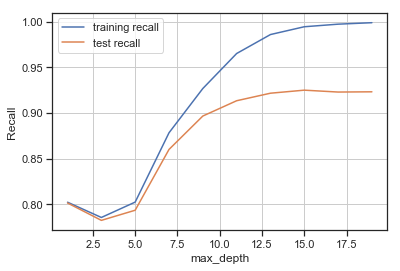

In [225]:
# plotting accuracies with max_depth

scores = tree1.cv_results_

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.grid()
plt.show()


** Observation **: Max_Depth of 12-14 seems to be good without overfitting

### Tuning min_samples_leaf

Let's try to find the optimum values for min_samples_leaf and understand how the value of min_samples_leaf affects the decision tree.

In [226]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data
tree2 = GridSearchCV(estimator = dtree, param_grid = parameters,
                   cv = n_folds, scoring = "recall", verbose=1, return_train_score=True, n_jobs=-1)
tree2.fit(df_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True

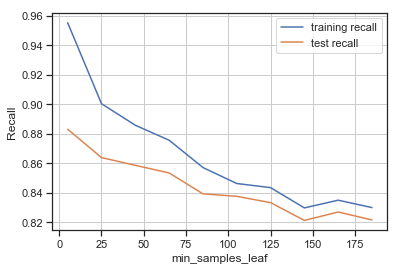

In [227]:
# plotting accuracies with min_samples_leaf

scores = tree2.cv_results_

plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid()
plt.show()

** Observation **: Around 10-25 value the test and train score get a good recall

### Tuning min_samples_split
The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [228]:
# Wait time 3 - 4 min 
n_folds = 3

parameters = {'min_samples_split': range(5, 200, 5)}
dtree = DecisionTreeClassifier()

tree3 = GridSearchCV(estimator = dtree, param_grid = parameters,
                   cv = n_folds, scoring = "recall", verbose = 1, return_train_score=True, n_jobs=-1)

tree3.fit(df_train_pca, y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:   46.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': range(5, 200, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True

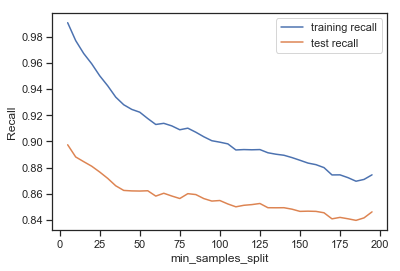

In [229]:
# Plot the results

scores = tree3.cv_results_

plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: At around the value of 10-25, the sensitivity is good

### Tuning max_features

In [230]:
n_folds = 3

parameters = {'max_features': range(4,40,4)}
dtree = DecisionTreeClassifier(criterion = "gini",
                              random_state = 100)

tree4 = GridSearchCV(estimator = dtree, param_grid = parameters,
                   cv = n_folds, scoring = "recall", verbose = 1, return_train_score=True, n_jobs=-1)

tree4.fit(df_train_pca, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    5.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': range(4, 40, 4)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
     

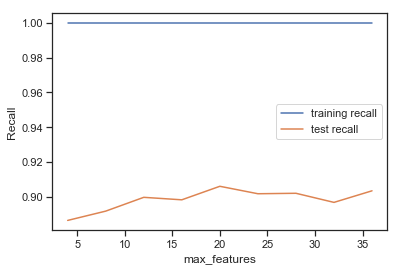

In [231]:
# Plot the results

scores = tree4.cv_results_

plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: Max_features 20 takes the highest score on recall with the test data

### GridSearch with all the parameters

** We can now use GridSearchCV to find multiple optimal hyperparameters together. **

In [232]:
# Create the parameter grid ( 2 - 3 min Wait time)

param_grid = {
    'max_depth': range(12, 16, 2),
    'min_samples_leaf': range(5, 25, 5),
    'min_samples_split': range(5, 25, 5),
    'max_features': [20],
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,scoring='recall',
                           cv = n_folds, verbose = 1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:   33.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(12, 16, 2), 'max_features': [20],
 

In [233]:
# cv results

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           1.664         0.030            0.010           0.000   
1           1.671         0.048            0.010           0.000   
2           1.673         0.053            0.015           0.004   
3           1.610         0.017            0.010           0.000   
4           1.546         0.005            0.017           0.005   
5           1.579         0.023            0.012           0.002   
6           1.590         0.016            0.011           0.001   
7           1.540         0.010            0.017           0.003   
8           1.554         0.040            0.010           0.000   
9           1.529         0.024            0.011           0.001   
10          1.527         0.005            0.010           0.000   
11          1.538         0.014            0.011           0.001   
12          1.505         0.013            0.014           0.005   
13          1.519         0.028            0.013           0.005   
14          1.561         0.019            0.010           0.000   
15          1.531         0.013            0.013           0.005   
16          1.659         0.017            0.011           0.001   
17          1.659         0.016            0.010           0.000   
18          1.675         0.016            0.014           0.004   
19          1.892         0.135            0.012           0.000   
20          1.747         0.148            0.013           0.002   
21          1.745         0.170            0.011           0.001   
22          1.624         0.029            0.011           0.000   
23          1.589         0.018            0.012           0.000   
24          1.570         0.012            0.012           0.002   
25          1.564         0.007            0.010           0.000   
26          1.590         0.012            0.011           0.001   
27          1.556         0.004            0.012           0.001   
28          1.518         0.024            0.010           0.000   
29          1.493         0.035            0.010           0.000   
30          1.518         0.024            0.010           0.000   
31          1.543         0.037            0.016           0.003   
32          0.986         0.014            0.013           0.004   
33          0.990         0.005            0.014           0.004   
34          0.993         0.016            0.013           0.005   
35          1.019         0.012            0.011           0.001   
36          0.977         0.014            0.013           0.004   
37          0.961         0.004            0.013           0.004   
38          1.000         0.011            0.014           0.004   
39          0.987         0.000            0.013           0.005   
40          0.975         0.016            0.011           0.000   
41          0.978         0.014            0.011           0.000   
42          0.977         0.004            0.011           0.001   
43          1.030         0.039            0.016           0.005   
44          1.088         0.021            0.012           0.000   
45          1.181         0.047            0.015           0.005   
46          1.204         0.127            0.012           0.000   
47          0.963         0.006            0.011           0.000   
48          1.236         0.048            0.011           0.000   
49          1.134         0.015            0.015           0.005   
50          1.124         0.030            0.019           0.008   
51          1.144         0.085            0.012           0.000   
52          1.138         0.060            0.023           0.012   
53          1.208         0.096            0.015           0.004   
54          1.099         0.022            0.013           0.003   
55          1.205         0.006            0.013           0.005   
56          1.047         0.015            0.013           0.003   
57          1.036         0.022            0.011           0

In [234]:
# printing the optimal accuracy score and hyperparameters
print("Best score", grid_search.best_score_)
print(grid_search.best_estimator_)

Best score 0.8949537648612946
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
                       max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### Building the model again with the identified optimal parameters

In [235]:
# model with optimal hyperparameters
dt = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=12, 
                                  max_features =20,
                                  min_samples_leaf=5,
                                  min_samples_split=10)
dt.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [236]:
y_pred = dt.predict(df_test_pca)

In [237]:
# Printing confusion matrix and Sensitivity

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

[[6779 1368]
 [ 223  428]]
0.8191634462377814
0.6574500768049155


### Observation: We see that Decision Tree Classifier after Hyperparameter tuning gives result of 63% on identifying Churners as Churners.

In [238]:
model_results.loc[model_results['Algorithm'] == 'Decision Tree', 'Accuracy'] = metrics.accuracy_score(y_test,y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Decision Tree', 'Recall'] = metrics.recall_score(y_test,y_pred) * 100

# Method 4 : Building Random Forest Model

In [239]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()


# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [240]:
# Making predictions
y_pred = rfc.predict(df_test_pca)

In [241]:
# Let's check the report of our default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8147
           1       0.40      0.48      0.44       651

    accuracy                           0.91      8798
   macro avg       0.68      0.71      0.69      8798
weighted avg       0.92      0.91      0.91      8798



In [242]:
print(accuracy_score(y_test,y_pred))

0.9074789724937485


In [243]:
print(metrics.recall_score(y_test, y_pred))

0.4823348694316436


** Observation ** : The Sensitivity of the Random Forest Model with the default Hyperparameters is 50%. Lets tune the hyperparameters 

### Random Forest Hyperparameters tuning

#### Tuning Max Depth

In [244]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rfc = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="recall", return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [245]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.645         0.009            0.021           0.007   
1          1.487         0.035            0.028           0.006   
2          1.961         0.093            0.036           0.007   
3          1.920         0.194            0.026           0.007   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}              0.676              0.797   
1               7   {'max_depth': 7}              0.847              0.863   
2              12  {'max_depth': 12}              0.925              0.934   
3              17  {'max_depth': 17}              0.949              0.942   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0              0.696            0.723           0.053                4   
1              0.857            0.856           0.007                3   
2              0.938            0.932           0.005                2   
3              0.947            0.946           0.003                1   

   split0_train_score  split1_train_score  split2_train_score  \
0               0.681               0.794               0.702   
1               0.872               0.876               0.870   
2               0.973               0.979               0.975   
3               0.997               0.998               0.997   

   mean_train_score  std_train_score  
0             0.726            0.049  
1             0.873            0.002  
2             0.976            0.002  
3             0.997            0.000

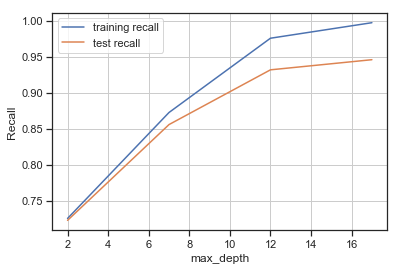

In [246]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.grid()
plt.show()

** Observation **: Max depth between 12 and 16 seem to provide highest recall

#### Tuning n_estimators

In [247]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}



# instantiate the model (note we are specifying a max_depth)
rfc = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="recall", return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [248]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          8.830         0.126            0.156           0.013   
1         42.728         0.208            0.781           0.026   
2         73.517         0.335            1.183           0.086   
3         90.218         6.787            1.262           0.115   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}              0.792   
1                500   {'n_estimators': 500}              0.786   
2                900   {'n_estimators': 900}              0.790   
3               1300  {'n_estimators': 1300}              0.789   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0              0.801              0.806            0.800           0.006   
1              0.805              0.798            0.796           0.007   
2              0.804              0.800            0.798           0.006   
3              0.804              0.799            0.797           0.006   

   rank_test_score  split0_train_score  split1_train_score  \
0                1               0.811               0.799   
1                4               0.803               0.802   
2                2               0.807               0.804   
3                3               0.806               0.801   

   split2_train_score  mean_train_score  std_train_score  
0               0.805             0.805            0.005  
1               0.803             0.802            0.001  
2               0.802             0.805            0.002  
3               0.802             0.803            0.002

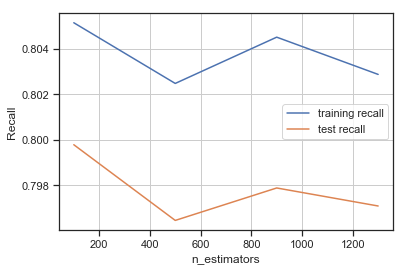

In [249]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.grid()
plt.show()

** Observation **: Number of estimators around 500 seems to be the most appropriate

#### Tuning Max Features

In [250]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall", return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [251]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.777         0.010            0.026           0.007   
1          1.269         0.015            0.026           0.007   
2          2.058         0.071            0.031           0.006   
3          2.577         0.060            0.021           0.007   
4          2.728         0.117            0.017           0.002   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}              0.767   
1                  8   {'max_features': 8}              0.788   
2                 14  {'max_features': 14}              0.782   
3                 20  {'max_features': 20}              0.794   
4                 24  {'max_features': 24}              0.773   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0              0.779              0.774            0.774           0.005   
1              0.776              0.798            0.787           0.009   
2              0.775              0.784            0.780           0.004   
3              0.790              0.797            0.794           0.003   
4              0.801              0.778            0.784           0.012   

   rank_test_score  split0_train_score  split1_train_score  \
0                5               0.782               0.781   
1                2               0.798               0.779   
2                4               0.792               0.775   
3                1               0.803               0.792   
4                3               0.781               0.799   

   split2_train_score  mean_train_score  std_train_score  
0               0.777             0.780            0.002  
1               0.797             0.791            0.009  
2               0.789             0.785            0.007  
3               0.806             0.801            0.006  
4               0.785             0.788            0.008

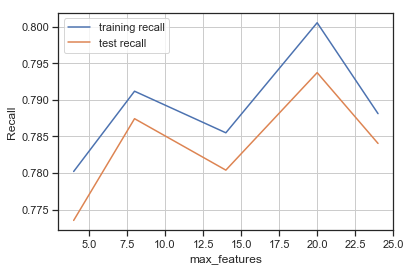

In [252]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.grid()
plt.show()

** Observation **: Maximum features around 15 seems to make most sense

#### Tuning Min Samples Leaf

In [253]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall", return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [254]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          1.752         0.044            0.036           0.001   
1          1.626         0.013            0.033           0.000   
2          1.526         0.017            0.033           0.006   
3          1.607         0.020            0.029           0.003   
4          1.420         0.126            0.032           0.001   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}              0.823   
1                    150  {'min_samples_leaf': 150}              0.809   
2                    200  {'min_samples_leaf': 200}              0.798   
3                    250  {'min_samples_leaf': 250}              0.786   
4                    300  {'min_samples_leaf': 300}              0.772   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0              0.833              0.837            0.831           0.006   
1              0.829              0.822            0.820           0.008   
2              0.804              0.808            0.803           0.004   
3              0.791              0.808            0.795           0.010   
4              0.810              0.795            0.792           0.015   

   rank_test_score  split0_train_score  split1_train_score  \
0                1               0.845               0.844   
1                2               0.829               0.842   
2                3               0.815               0.814   
3                4               0.805               0.799   
4                5               0.787               0.813   

   split2_train_score  mean_train_score  std_train_score  
0               0.845             0.845            0.001  
1               0.837             0.836            0.005  
2               0.815             0.815            0.000  
3               0.811             0.805            0.005  
4               0.801             0.800            0.010

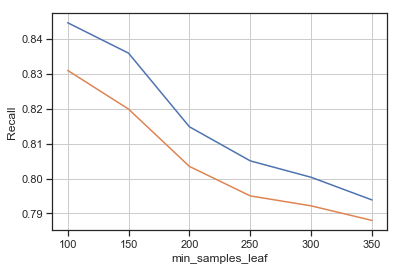

In [255]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend
plt.grid()
plt.show()

** Observation **: Between 100 and 150 for the min_samples_leaf

#### Tuning min_samples_split

In [256]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall", return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [257]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          2.477         0.197            0.049           0.009   
1          2.542         0.248            0.049           0.012   
2          2.375         0.156            0.060           0.028   
3          2.148         0.031            0.033           0.002   
4          2.341         0.086            0.036           0.002   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}              0.829   
1                     250  {'min_samples_split': 250}              0.828   
2                     300  {'min_samples_split': 300}              0.816   
3                     350  {'min_samples_split': 350}              0.815   
4                     400  {'min_samples_split': 400}              0.807   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0              0.863              0.850            0.848           0.014   
1              0.843              0.841            0.837           0.007   
2              0.827              0.830            0.824           0.006   
3              0.824              0.837            0.825           0.009   
4              0.825              0.824            0.818           0.008   

   rank_test_score  split0_train_score  split1_train_score  \
0                1               0.867               0.881   
1                2               0.854               0.856   
2                4               0.842               0.841   
3                3               0.840               0.836   
4                5               0.827               0.835   

   split2_train_score  mean_train_score  std_train_score  
0               0.866             0.871            0.007  
1               0.856             0.855            0.001  
2               0.839             0.840            0.001  
3               0.849             0.842            0.005  
4               0.835             0.832            0.004

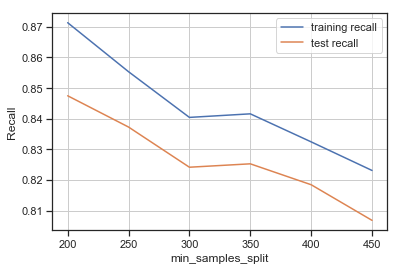

In [258]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid()
plt.show()

** Observation **: Between 200 to 250 for minimum samples split, the recall is high

### Find the Optimal hyperparameters

In [259]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12],
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(200, 250, 25),
    'n_estimators': [500], 
    'max_features': [14]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='recall',
                          cv = 3, verbose = 1, return_train_score=True, n_jobs=-1)



In [260]:
# Fit the grid search to the data - NOTE: Takes more than 20 -25 mins to execute
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  4.4min remaining:   53.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [261]:
# printing the optimal recall score and hyperparameters
print('We get a score of',grid_search.best_score_,'using',grid_search.best_params_)

We get a score of 0.8415323645970938 using {'max_depth': 12, 'max_features': 14, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 500}


### Fitting the final model with the best parameters obtained from grid search.

In [262]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=14,
                             n_estimators=500)

In [263]:
# fit
rfc.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [264]:
# predict
y_pred = rfc.predict(df_test_pca)

In [265]:
# Sensitivity
print(metrics.recall_score(y_test,  y_pred))

0.7572964669738863


In [266]:
model_results.loc[model_results['Algorithm'] == 'Random Forests', 'Accuracy'] =  metrics.accuracy_score(y_test, y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Random Forests', 'Recall'] =  metrics.recall_score(y_test, y_pred) * 100

In [267]:
model_results

Algorithm  Accuracy  Recall
0  Logistic Regression    82.178  81.260
1                  SVM     0.000   0.000
2        Decision Tree    81.916  65.745
3       Random Forests    86.031  75.730
4            Ada Boost     0.000   0.000

** Observation ** : The Sensitivity of the Random Forest Model with the tuned Hyperparameters is 77% 

# Method 5: AdaBoost Classifier

In [268]:
# adaboost classifier with max 600 decision trees of depth 2
# learning rate/ shrinkage=1.5

tree = DecisionTreeClassifier(max_depth=2)

adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=1.5,
    algorithm="SAMME", 
    n_estimators = 200)

In [269]:
adaboost_model_1.fit(df_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [270]:
y_pred = adaboost_model_1.predict_proba(df_test_pca)

In [271]:
print(metrics.roc_auc_score(y_test, y_pred[:, 1]))


0.851416474206577


In [272]:
y_pred = adaboost_model_1.predict(df_test_pca)

In [273]:
print(metrics.recall_score(y_test, y_pred))

0.7142857142857143


### AdaBoost - Hyperparameter tuning

max_depth, n_estimators, learning_rate will be tuned 

In [274]:
n_folds = 3

param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400]}

In [275]:
tree = DecisionTreeClassifier() 

ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=1.5,
    algorithm="SAMME")

In [276]:
# run grid search
grid_search_ABC = GridSearchCV(ABC, 
                               cv = n_folds,
                               param_grid=param_grid, 
                               scoring = 'recall', 
                               return_train_score=True,                         
                               verbose = 1, n_jobs = -1)


In [277]:
# fit - takes 30 -35  mins to complete
grid_search_ABC.fit(df_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  7.8min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  8.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [278]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        102.759         0.389            1.250           0.136   
1        204.728         0.123            2.660           0.037   
2        219.563        15.436            0.926           0.076   
3        338.920        18.280            1.418           0.220   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                200   
1                               2                400   
2                               5                200   
3                               5                400   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'n_estimators...              0.860   
1  {'base_estimator__max_depth': 2, 'n_estimators...              0.867   
2  {'base_estimator__max_depth': 5, 'n_estimators...              0.969   
3  {'base_estimator__max_depth': 5, 'n_estimators...              0.982   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0              0.884              0.871            0.872           0.010   
1              0.896              0.893            0.885           0.013   
2              0.972              0.976            0.972           0.003   
3              0.984              0.983            0.983           0.001   

   rank_test_score  split0_train_score  split1_train_score  \
0                4               0.896               0.897   
1                3               0.920               0.926   
2                2               1.000               1.000   
3                1               1.000               1.000   

   split2_train_score  mean_train_score  std_train_score  
0               0.882             0.892            0.007  
1               0.923             0.923            0.002  
2               1.000             1.000            0.000  
3               1.000             1.000            0.000

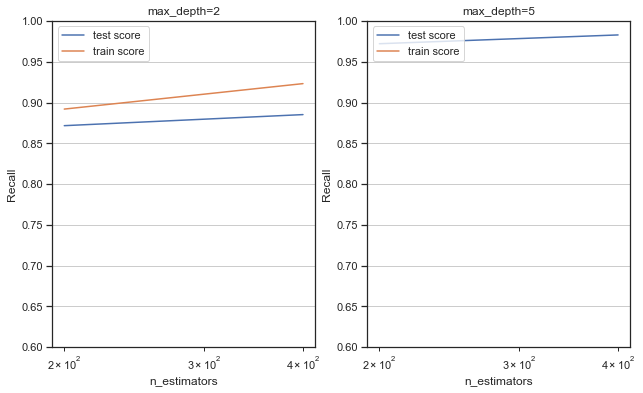

In [279]:
# plotting recall score with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('Recall')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')
    plt.grid()


** Observation **: We see that with depth 5, the ensemble is overfitting. So we can go with n_estimators = 400 and max depth = 2

In [280]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=1.5,
    n_estimators=400,
    algorithm="SAMME")

ABC.fit(df_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [281]:
y_pred = ABC.predict(df_test_pca)

In [282]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.8611047965446692
0.6866359447004609


### ** Observation **:Based on all models above, we deem that the model with 400 n estimators and max depth 2 has the best recall percentage with 68% and works best for identifying the telecom churners and potentially promote offers, thus help with retention

In [283]:
# Updating the results in the model_results dataframe to enable comparison

In [284]:
model_results.loc[model_results['Algorithm'] == 'Ada Boost', 'Accuracy'] = metrics.accuracy_score(y_test, y_pred) * 100 
model_results.loc[model_results['Algorithm'] == 'Ada Boost', 'Recall'] = metrics.recall_score(y_test, y_pred) * 100 


## Observations:

In [285]:
model_results

Algorithm  Accuracy  Recall
0  Logistic Regression    82.178  81.260
1                  SVM     0.000   0.000
2        Decision Tree    81.916  65.745
3       Random Forests    86.031  75.730
4            Ada Boost    86.110  68.664

In [286]:
# We will remove SVM since we are not considering it due to high execution time.

model_results = model_results.loc[model_results['Algorithm'] != 'SVM']

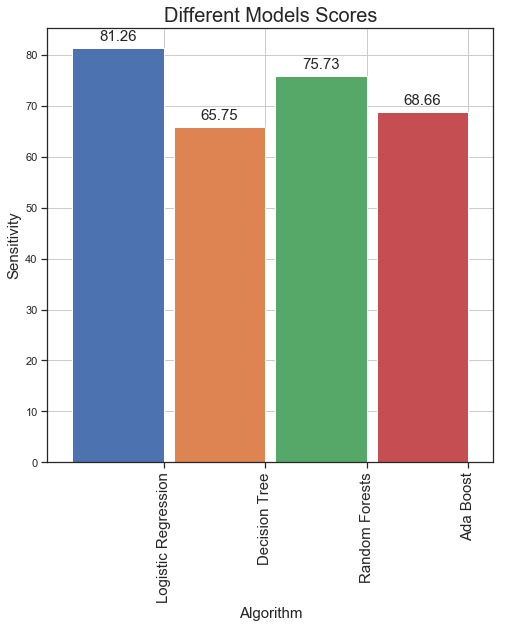

In [287]:
# Plot to show the model performances on Accuracy and Sensitivity

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
width = 0.9

model_results.Recall.plot(kind='bar', ax=ax, width=width, position=1)

rects = ax.patches
for rect in rects: 
    height = rect.get_height() 
    ax.text(rect.get_x() + rect.get_width()/2, height+1, round(height,2), ha="center", va="bottom", fontsize = 15) 
plt.title("Different Models Scores", fontsize = 20)

ax.set_xticklabels(model_results.Algorithm, fontsize=15, rotation=90)
ax.set_ylabel('Sensitivity',fontsize=15)

plt.xlabel('Algorithm', fontsize = 15)

plt.grid()
plt.show()

## We infer from the graph that Logistic Regression Model Peforms well on Sensitivity with a Recall Percentage of 84.8% to identify the Churners Correctly

In [294]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [200, 300], 
    'max_features': [20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [295]:
# Fit the grid search to the data ( 60 Min )
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  6.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [296]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9084808454425364 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [298]:
rf = RandomForestClassifier(max_depth=10,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [299]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

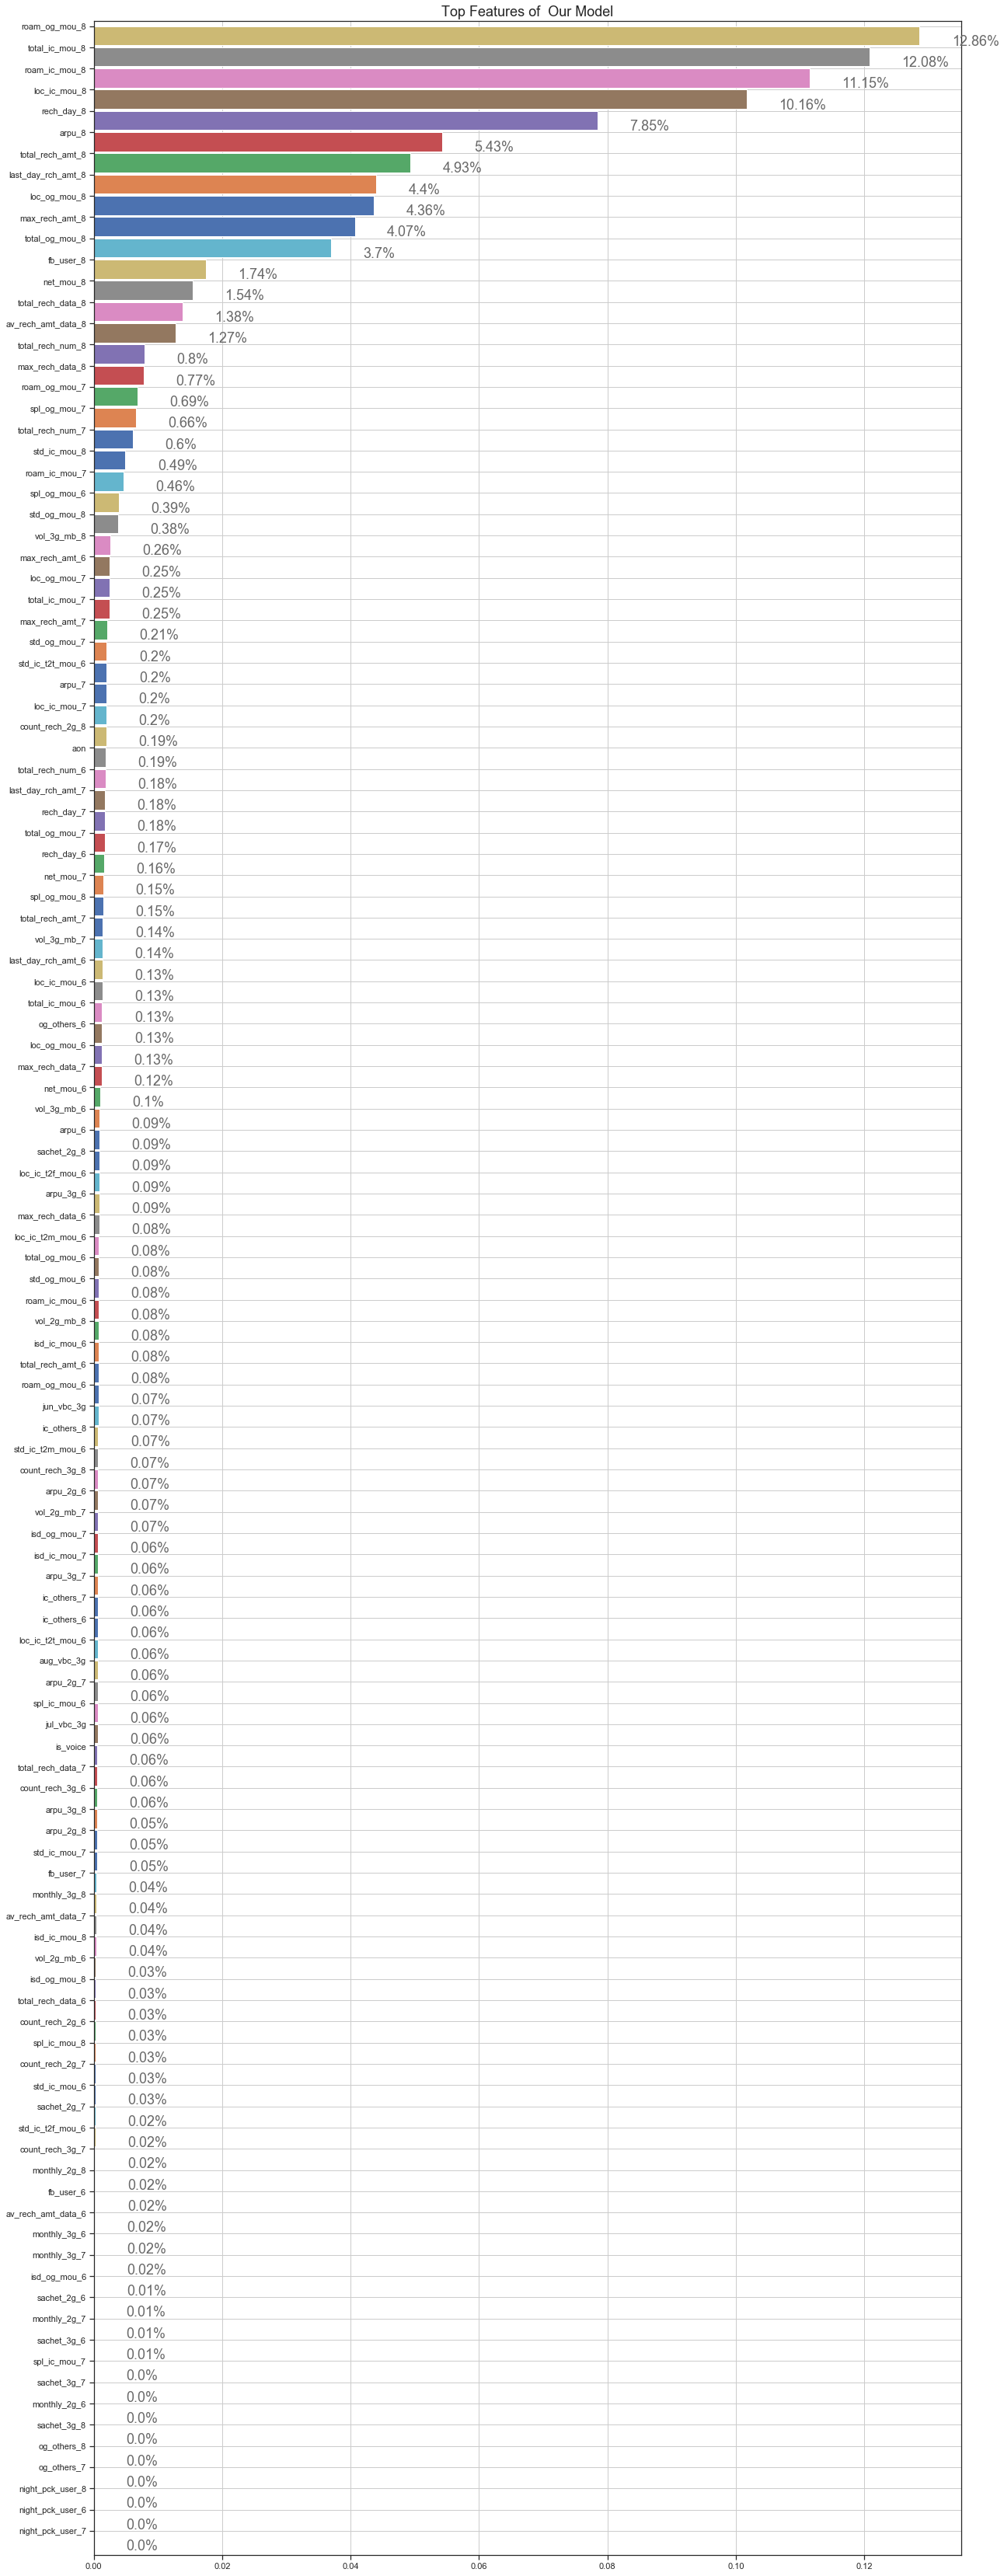

In [306]:
# Plot to show the Important Features of our Model 

fig = plt.figure(figsize=(20,60))
ax = fig.add_subplot(111)
width = 0.9

Important_Attribute = pd.Series(rf.feature_importances_, index=X.columns)
Important_Attribute.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center',
                                                                ax=ax, width=width, position=1)

ax.set_title("Top Features of  Our Model", fontsize=18)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.005, i.get_y()+.0009, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=18,
color='dimgrey')


plt.grid()
plt.show()

We can see above are the top main predictiors of churn as per our case study .

Above Figure suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:


1.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
2.	**loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
3.	**total_month_rech_8**	-- *Total month recharge amount in month 8*	
4.	**total_roam_mou_8**	-- *Total incoming+outgoing roaming minutes of usage in month 8*
5.	**loc_ic_t2m_mou_8**	-- *local incoming calls to another operator minutes of usage in month 8*
6.	**roam_og_mou_8**		-- *outgoing roaming calls minutes of usage in month 8*
7.	**Total_loc_mou_8**		-- *Total local minutes of usage in month 8*
8.	**roam_ic_mou_8**		-- *incoming roaming calls minutes of usage in month 8*
9.	**total_rech_amt_8**	-- *total recharge amount in month 8*
10.	**loc_ic_t2t_mou_8**	-- *local incoming calls from same operator minutes of usage in month 8*
11.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
12.	**last_day_rch_amt_8**	-- *last (most recent) recharge amount in month 8*
13.	**arpu_8**				-- *average revenue per user in month 8*
14.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
15.	**loc_og_t2n_mou_8**	-- *local outgoing calls minutes of usage to other operator mobile in month 8*
16.	**av_rech_amt_data_8**	-- *average recharge amount for mobile data in month 8*
17.	**total_rech_data_8**	-- *total data recharge (MB) in month 8*
18.	**total_og_t2t_mou_8**	-- *total outgoing calls from same operator minutes of usage in month 8*
19.	**total_rech_num_8**	-- *total number of recharges done in the month 8*
20.	**total_rech_amt_data_8**	-- *total recharge amount for data in month 8*
21.	**max_rech_data_8**		-- *maximum data recharge (MB) in month 8*
22.	**avg_rech_amt_8**		-- *average recharge amount in month 8*
23.	**fb_user_8**			-- *services of Facebook and similar social networking sites for month 8*
24.	**vol_data_mb_8**		-- *volume of data (MB) consumed for month 8*
25.	**count_rech_2g_8**		-- *Number of 2g data recharge in month 8*
26.	**loc_og_to_ic_mou_8**	-- *local outgoing to incoming mou ratio for month of 8*
27.	**spl_og_mou_7**		-- *Special outgoing call for the month of 7*